# Conclusion

Decision tree classification with kfolds=5, sample_weight='balanced', and pruned parameter values found with `RandomizedSearchCV`.

Best model accuracy.

## HOME_TEAM_WINS

Target to beat - 59.1% home winrate

Achieved - **68% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|68%|66%|65%|
|max_depth|64%|64%|62%|
|~~min_impurity_decrease~~|63%|63%|62%|
|max_leaf_nodes|66%|65%|64%|
|max_features|65%|64%|64%|

## HOME_HIGHER_FG_PCT

Target to beat - 55.0% rate of home having higher FGP

Achieved - **64% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|64%|63%|61%|
|max_depth|63%|63%|61%|
|~~min_impurity_decrease~~|62%|61%|58%|
|max_leaf_nodes|65%|63%|60%|
|max_features|64%|62%|60%|

## HOME_HIGHER_FG3_PCT

Target to beat - 50.8% rate of home having higher FG3

Achieved - **62% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|60%|58%|57%|
|max_depth|62%|60%|59%|
|~~min_impurity_decrease~~|55%|53%|52%|
|max_leaf_nodes|61%|57%|53%|
|max_features|60%|59%|57%|

## HOME_HIGHER_FT_PCT

Target to beat - 49.5% rate of home having higher FTP

Achieved - **61% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|60%|59%|57%|
|max_depth|59%|58%|56%|
|~~min_impurity_decrease~~|60%|55%|50%|
|max_leaf_nodes|60%|57%|55%|
|max_features|61%|58%|54%|

## HOME_HIGHER_AST

Target to beat - 55.0% rate of home having higher AST

Achieved - **65% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|62%|61%|59%|
|max_depth|65%|62%|58%|
|~~min_impurity_decrease~~|60%|59%|57%|
|max_leaf_nodes|61%|60%|60%|
|max_features|62%|60%|58%|

## HOME_HIGHER_REB

Target to beat - 53.4% rate of home having higher REB

Achieved - **63% accuracy**

|Pruning|Max Accuracy|Mean Accuracy|Min Accuracy|
|-|-|-|-|
|None|62%|59%|57%|
|max_depth|63%|60%|58%|
|~~min_impurity_decrease~~|61%|58%|56%|
|max_leaf_nodes|63%|60%|58%|
|max_features|62%|60%|57%|


In [4]:
## Make width of notebook 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false; // disable scrollable frames
}

<IPython.core.display.Javascript object>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from datasets import data as Local ## Local module to get dataframes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [7]:
games_df, winners_df, greater_fgp_df, greater_fg3_df, greater_ft_df, greater_ast_df, greater_reb_df, cumulative_stats_df, games_details_df, teams_df, players_df, ranking_df = \
    Local.get_all_dataset_dataframes('../../datasets/')

# Target datasets

- Home has:
    - 59.1% Winrate
    - 55.0% Rate of Higher FGP
    - 50.8% Rate of Higher FG3
    - 49.5% Rate of Higher FTP
    - 55.0% Rate of Higher AST
    - 53.4% Rate of Higher REB

In [8]:
winners_df # Whether the home team won in a game in each row of `games_df`

16157    1
16156    1
16155    1
16154    1
16153    1
        ..
4        0
3        0
2        0
1        1
0        1
Name: HOME_TEAM_WINS, Length: 23520, dtype: int64

In [9]:
winners_df.describe()

count    23520.000000
mean         0.591029
std          0.491654
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_TEAM_WINS, dtype: float64

In [10]:
greater_fgp_df.describe()

count    23520.000000
mean         0.550468
std          0.497457
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG_PCT, dtype: float64

In [11]:
greater_fg3_df.describe()

count    23520.000000
mean         0.507993
std          0.499947
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FG3_PCT, dtype: float64

In [12]:
greater_ft_df.describe()

count    23520.000000
mean         0.494855
std          0.499984
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_FT_PCT, dtype: float64

In [13]:
greater_ast_df.describe()

count    23520.000000
mean         0.550128
std          0.497491
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_AST, dtype: float64

In [14]:
greater_reb_df.describe()

count    23520.000000
mean         0.533886
std          0.498861
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: HOME_HIGHER_REB, dtype: float64

# Datasets

In [15]:
games_df

GAME_DATE_EST   GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID  SEASON  \
16157    2003-10-05  10300001    1610612762       1610612742    2003   
16156    2003-10-06  10300002    1610612763       1610612749    2003   
16155    2003-10-07  10300009    1610612758       1610612746    2003   
16154    2003-10-07  10300005    1610612757       1610612745    2003   
16153    2003-10-07  10300007    1610612748       1610612755    2003   
...             ...       ...           ...              ...     ...   
4        2020-12-18  12000040    1610612761       1610612748    2020   
3        2020-12-18  12000039    1610612754       1610612755    2020   
2        2020-12-19  12000049    1610612763       1610612737    2020   
1        2020-12-19  12000048    1610612764       1610612765    2020   
0        2020-12-19  12000047    1610612753       1610612766    2020   

       PTS_home  FG_PCT_home  FT_PCT_home  FG3_PCT_home  AST_home  REB_home  \
16157      90.0        0.457        0.735         0.143      23.0      41.0   
16156     105.0        0.494        0.618         0.267      25.0      48.0   
16155     101.0        0.467        0.871         0.444      19.0      39.0   
16154     104.0        0.527        0.657         0.429      22.0      33.0   
16153      86.0        0.352        0.647         0.222      15.0      55.0   
...         ...          ...          ...           ...       ...       ...   
4         105.0        0.380        0.737         0.356      27.0      37.0   
3         107.0        0.371        0.692         0.262      19.0      45.0   
2         116.0        0.400        0.744         0.396      21.0      43.0   
1          99.0        0.427        0.625         0.295      24.0      45.0   
0         120.0        0.433        0.792         0.425      23.0      50.0   

       PTS_away  FG_PCT_away  FT_PCT_away  FG3_PCT_away  AST_away  REB_away  
16157      85.0        0.447        0.500         0.250      20.0      38.0  
16156      94.0        0.427        0.700         0.154      20.0      43.0  
16155      82.0        0.368        0.609         0.364      13.0      50.0  
16154      80.0        0.470        0.667         0.333      10.0      37.0  
16153      79.0        0.329        0.897         0.143       7.0      44.0  
...         ...          ...          ...           ...       ...       ...  
4         117.0        0.534        0.741         0.514      30.0      51.0  
3         113.0        0.533        0.629         0.355      23.0      48.0  
2         117.0        0.422        0.837         0.297      24.0      47.0  
1          96.0        0.402        0.647         0.326      18.0      51.0  
0         117.0        0.444        0.864         0.439      21.0      52.0  

[23520 rows x 17 columns]

In [16]:
cumulative_stats_df

DATE   GAME_ID  SEASON_TYPE  SEASON  GAMES_PLAYED_home  \
0      2003-10-05  10300001            1    2003                  0   
1      2003-10-06  10300002            1    2003                  0   
2      2003-10-07  10300009            1    2003                  0   
3      2003-10-07  10300005            1    2003                  0   
4      2003-10-07  10300007            1    2003                  0   
...           ...       ...          ...     ...                ...   
23515  2020-12-18  12000040            1    2020                  2   
23516  2020-12-18  12000039            1    2020                  2   
23517  2020-12-19  12000049            1    2020                  3   
23518  2020-12-19  12000048            1    2020                  2   
23519  2020-12-19  12000047            1    2020                  3   

       GAMES_PLAYED_away  PPG_total_home  FG_PCT_total_home  \
0                      0        0.000000           0.000000   
1                      0        0.000000           0.000000   
2                      0        0.000000           0.000000   
3                      0        0.000000           0.000000   
4                      0        0.000000           0.000000   
...                  ...             ...                ...   
23515                  1      111.500000           0.443500   
23516                  1      105.000000           0.438000   
23517                  3      119.333333           0.466667   
23518                  3      100.000000           0.415000   
23519                  3      112.666667           0.444333   

       FG3_PCT_total_home  FT_PCT_total_home  APG_total_home  RPG_total_home  \
0                0.000000           0.000000        0.000000        0.000000   
1                0.000000           0.000000        0.000000        0.000000   
2                0.000000           0.000000        0.000000        0.000000   
3                0.000000           0.000000        0.000000        0.000000   
4                0.000000           0.000000        0.000000        0.000000   
...                   ...                ...             ...             ...   
23515            0.353000           0.691000       25.000000       41.500000   
23516            0.383000           0.619000       26.000000       35.500000   
23517            0.329333           0.704667       30.666667       52.666667   
23518            0.321500           0.704500       22.000000       44.500000   
23519            0.305333           0.758000       25.000000       51.333333   

       PPG_total_away  FG_PCT_total_away  FG3_PCT_total_away  \
0            0.000000           0.000000            0.000000   
1            0.000000           0.000000            0.000000   
2            0.000000           0.000000            0.000000   
3            0.000000           0.000000            0.000000   
4            0.000000           0.000000            0.000000   
...               ...                ...                 ...   
23515       92.000000           0.427000            0.283000   
23516      108.000000           0.471000            0.241000   
23517      111.333333           0.392667            0.332333   
23518       93.333333           0.413333            0.333000   
23519      110.666667           0.442333            0.372333   

       FT_PCT_total_away  APG_total_away  RPG_total_away  TEAM_ID_away  \
0               0.000000        0.000000        0.000000  1.610613e+09   
1               0.000000        0.000000        0.000000  1.610613e+09   
2               0.000000        0.000000        0.000000  1.610613e+09   
3               0.000000        0.000000        0.000000  1.610613e+09   
4               0.000000        0.000000        0.000000  1.610613e+09   
...                  ...             ...             ...           ...   
23515           0.818000       26.000000       35.000000  1.610613e+09   
23516           0.750000       23.000000       42.000000  1.610613e+09   
23517  

## Attach target columns to dataset

In [17]:
cumulative_stats_copy_df = cumulative_stats_df.copy()
cumulative_stats_copy_df['home_win'] = winners_df
cumulative_stats_copy_df['greater_fgp'] = greater_fgp_df
cumulative_stats_copy_df['greater_fg3'] = greater_fg3_df
cumulative_stats_copy_df['greater_ft'] = greater_ft_df
cumulative_stats_copy_df['greater_ast'] = greater_ast_df
cumulative_stats_copy_df['greater_reb'] = greater_reb_df

## Remove rows w/o data

In [18]:
cumulative_stats_copy_df = cumulative_stats_copy_df[(cumulative_stats_copy_df['GAMES_PLAYED_home']>0) & (cumulative_stats_copy_df['GAMES_PLAYED_away']>0)]

# Get new target datasets after row removal
winners_df = cumulative_stats_copy_df['home_win']
greater_fgp_df = cumulative_stats_copy_df['greater_fgp']
greater_fg3_df = cumulative_stats_copy_df['greater_fg3']
greater_ft_df = cumulative_stats_copy_df['greater_ft']
greater_ast_df = cumulative_stats_copy_df['greater_ast']
greater_reb_df = cumulative_stats_copy_df['greater_reb']

## Remove non-data

In [19]:
# Delete non-data
for key in [
    'DATE','GAME_ID','TEAM_ID_home','TEAM_ID_away','SEASON_TYPE','SEASON','GAMES_PLAYED_home','GAMES_PLAYED_away',
    'home_win','greater_fgp','greater_fg3','greater_ft','greater_ast','greater_reb'
]:
    del cumulative_stats_copy_df[key]
# Only look at home teams
# cumulative_stats_copy_df = cumulative_stats_copy_df.loc[cumulative_stats_copy_df['AT_HOME']==True]
# del cumulative_stats_copy_df['AT_HOME']
cumulative_stats_copy_df

PPG_total_home  FG_PCT_total_home  FG3_PCT_total_home  \
19         104.000000           0.527000            0.429000   
21          86.000000           0.380000            0.188000   
22          86.000000           0.352000            0.222000   
23          58.000000           0.457000            0.667000   
24          87.500000           0.432000            0.420000   
...               ...                ...                 ...   
23515      111.500000           0.443500            0.353000   
23516      105.000000           0.438000            0.383000   
23517      119.333333           0.466667            0.329333   
23518      100.000000           0.415000            0.321500   
23519      112.666667           0.444333            0.305333   

       FT_PCT_total_home  APG_total_home  RPG_total_home  PPG_total_away  \
19              0.657000       22.000000       33.000000      101.000000   
21              0.852000       19.000000       37.000000      101.000000   
22              0.647000       15.000000       55.000000       80.000000   
23              0.700000       10.000000       31.000000       89.000000   
24              0.672000       20.500000       43.000000       79.000000   
...                  ...             ...             ...             ...   
23515           0.691000       25.000000       41.500000       92.000000   
23516           0.619000       26.000000       35.500000      108.000000   
23517           0.704667       30.666667       52.666667      111.333333   
23518           0.704500       22.000000       44.500000       93.333333   
23519           0.758000       25.000000       51.333333      110.666667   

       FG_PCT_total_away  FG3_PCT_total_away  FT_PCT_total_away  \
19              0.467000            0.444000           0.871000   
21              0.464000            0.250000           0.679000   
22              0.350000            0.429000           0.750000   
23              0.462000            0.214000           0.538000   
24              0.329000            0.143000           0.897000   
...                  ...                 ...                ...   
23515           0.427000            0.283000           0.818000   
23516           0.471000            0.241000           0.750000   
23517           0.392667            0.332333           0.789667   
23518           0.413333            0.333000           0.713000   
23519           0.442333            0.372333           0.751000   

       APG_total_away  RPG_total_away  W_PCT_away  W_PCT_home  
19          19.000000       39.000000    1.000000    1.000000  
21          22.000000       47.000000    1.000000    0.000000  
22          18.000000       45.000000    0.000000    1.000000  
23          21.000000       36.000000    0.000000    0.000000  
24           7.000000       44.000000    0.000000    0.500000  
...               ...             ...         ...         ...  
23515       26.000000       35.000000    0.000000    1.000000  
23516       23.000000       42.000000    1.000000    0.000000  
23517       24.000000       56.000000    0.333333    1.000000  
23518       20.000000       41.666667    0.666667    0.000000  
23519       29.666667       45.000000    0.333333    0.333333  

[23147 rows x 14 columns]

## Do hyperparameters searches

In [20]:
from sklearn.metrics import classification_report

In [21]:
from sklearn.tree import plot_tree
from yellowbrick.model_selection import FeatureImportances

In [22]:
from sklearn.utils.class_weight import compute_sample_weight

In [23]:
# Get best params based from CV function
def do_cv(classifier, cv_fun, params, x, y, **kwargs):
    clf = cv_fun(
        classifier,
        params,
        scoring='accuracy', # Optimize for the 'accuracy' score of the model.
        **kwargs,
    )
#     clf.fit(x, y, sample_weight=compute_sample_weight('balanced',y))
    clf.fit(x, y)
    return clf

## Plot feature importances

In [24]:
def plot_feature_importances(clf, X, y):
    viz = FeatureImportances(clf, labels=X.columns)
    viz.fit(X, y)
    viz.show()

In [25]:
def print_all_metrics_and_plot(clf, X_train_dict, X_test_dict, y_train_dict, y_test_dict, grid_cv_params):
    scores = []
    for key in X_train_dict.keys():
        cv_clf = do_cv(
            clf,
#             GridSearchCV,
            RandomizedSearchCV,
            grid_cv_params,
            X_train_dict[key],
            y_train_dict[key],
        )
        print(key.upper()+':\n')
        score = cv_clf.best_estimator_.score(X_test_dict[key], y_test_dict[key])
        scores.append(score)
        print('Best decision tree accuracy (%s): %.2f' % (str(cv_clf.best_params_), score))
        print(classification_report(y_test_dict[key], cv_clf.best_estimator_.predict(X_test_dict[key])))
        plot_feature_importances(cv_clf.best_estimator_, X_train_dict[key], y_train_dict[key])
        print('---------------------------------------------')
    return scores

## Build K-folds datasets

In [26]:
from imblearn.combine import SMOTEENN

In [27]:
from sklearn.model_selection import KFold
kf = KFold(shuffle=True, random_state=123)

X_train_dicts = []
X_test_dicts = []
y_train_dicts = []
y_test_dicts = []

for target, key in [(winners_df, 'winner'), (greater_fgp_df, 'fgp'), (greater_fg3_df, 'fg3'), (greater_ft_df, 'ft'), (greater_ast_df, 'ast'), (greater_reb_df, 'reb')]:
    X_over, y_over = SMOTEENN(sampling_strategy='all').fit_resample(cumulative_stats_copy_df, target)
    for train, test in kf.split(X_over, y_over):
        X_train_dict = {}
        X_test_dict = {}
        y_train_dict = {}
        y_test_dict = {}
        
        X_train_dict[key], X_test_dict[key] = X_over.iloc[train], X_over.iloc[test]
        y_train_dict[key], y_test_dict[key] = y_over.iloc[train], y_over.iloc[test]
        
        X_train_dicts.append(X_train_dict)
        X_test_dicts.append(X_test_dict)
        y_train_dicts.append(y_train_dict)
        y_test_dicts.append(y_test_dict)

assert len(X_train_dicts)==len(X_test_dicts)==len(y_train_dicts)==len(y_test_dicts)
print(len(X_train_dicts))

30


In [29]:
def print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, params):
    scores=[]
    for i in range(len(X_train_dicts)):
        print(f'i={i}')
        score = print_all_metrics_and_plot(
            DecisionTreeClassifier(random_state=0),
            X_train_dicts[i],
            X_test_dicts[i],
            y_train_dicts[i],
            y_test_dicts[i],
            params,
        )
        if (i+1)%5==0:
            scores = pd.DataFrame(np.array(scores))
            print(f'Mean accuracy: {scores.mean()[0]}')
            print(f'Max accuracy: {scores.max()[0]}')
            print(f'Min accuracy: {scores.min()[0]}')
            print('=========================================')
            scores=[]
        else:
            scores += score

## Train decision tree w/o pruning

i=0


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       855
           1       0.54      0.53      0.53       506

    accuracy                           0.66      1361
   macro avg       0.63      0.63      0.63      1361
weighted avg       0.65      0.66      0.65      1361



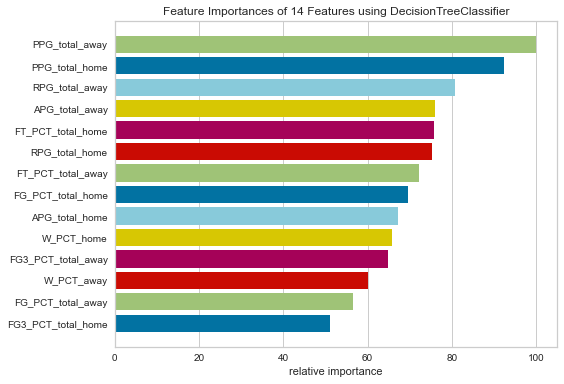

---------------------------------------------
i=1


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       847
           1       0.53      0.48      0.51       514

    accuracy                           0.65      1361
   macro avg       0.62      0.61      0.62      1361
weighted avg       0.64      0.65      0.64      1361



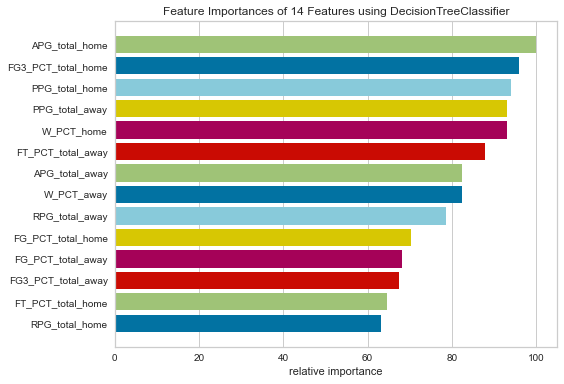

---------------------------------------------
i=2


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.68
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       862
           1       0.57      0.57      0.57       499

    accuracy                           0.68      1361
   macro avg       0.66      0.66      0.66      1361
weighted avg       0.68      0.68      0.68      1361



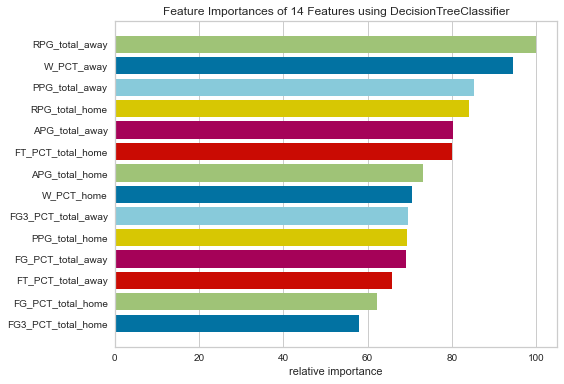

---------------------------------------------
i=3


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       857
           1       0.53      0.49      0.51       504

    accuracy                           0.65      1361
   macro avg       0.62      0.62      0.62      1361
weighted avg       0.64      0.65      0.65      1361



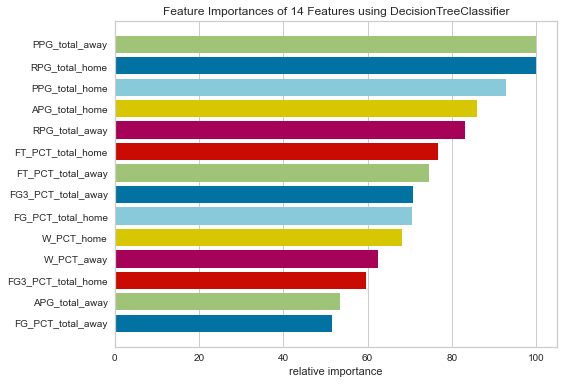

---------------------------------------------
i=4


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       863
           1       0.50      0.48      0.49       497

    accuracy                           0.64      1360
   macro avg       0.61      0.60      0.60      1360
weighted avg       0.63      0.64      0.63      1360



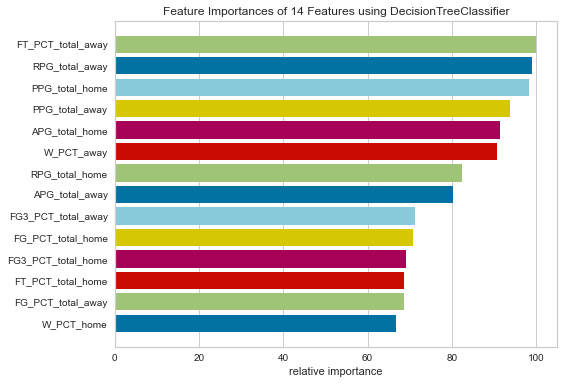

---------------------------------------------
Mean accuracy: 0.6577883908890522
Max accuracy: 0.6818515797207936
Min accuracy: 0.6458486407053637
i=5


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       599
           1       0.53      0.56      0.55       389

    accuracy                           0.63       988
   macro avg       0.62      0.62      0.62       988
weighted avg       0.64      0.63      0.63       988



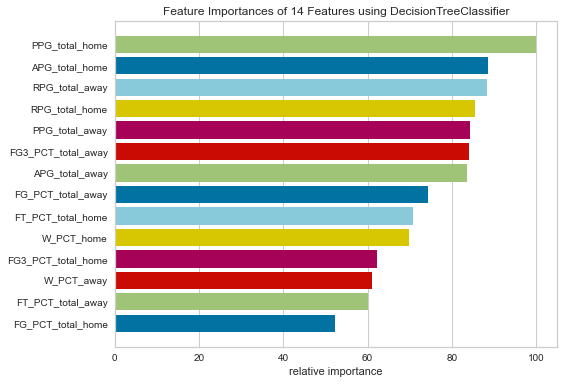

---------------------------------------------
i=6


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       614
           1       0.51      0.53      0.52       374

    accuracy                           0.63       988
   macro avg       0.61      0.61      0.61       988
weighted avg       0.63      0.63      0.63       988



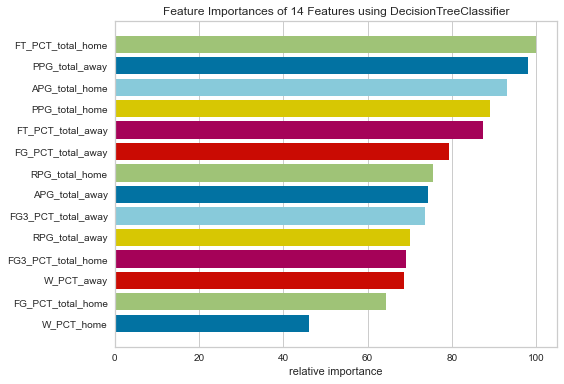

---------------------------------------------
i=7


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       573
           1       0.57      0.54      0.55       414

    accuracy                           0.64       987
   macro avg       0.63      0.62      0.62       987
weighted avg       0.64      0.64      0.64       987



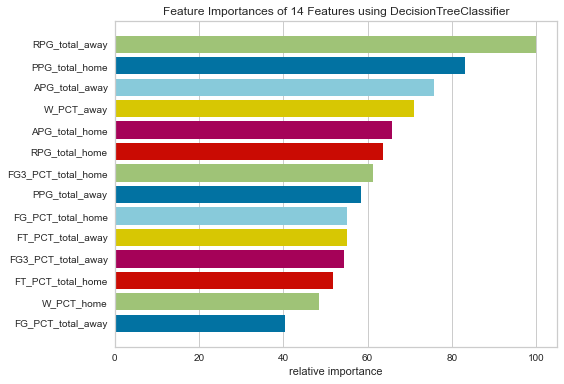

---------------------------------------------
i=8


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       613
           1       0.48      0.52      0.50       374

    accuracy                           0.61       987
   macro avg       0.59      0.59      0.59       987
weighted avg       0.61      0.61      0.61       987



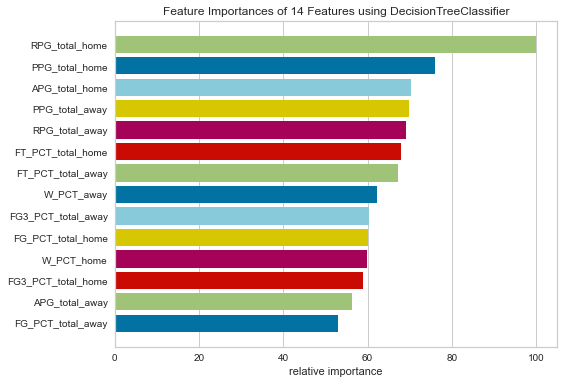

---------------------------------------------
i=9


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.68      0.71      0.69       574
           1       0.56      0.53      0.55       413

    accuracy                           0.63       987
   macro avg       0.62      0.62      0.62       987
weighted avg       0.63      0.63      0.63       987



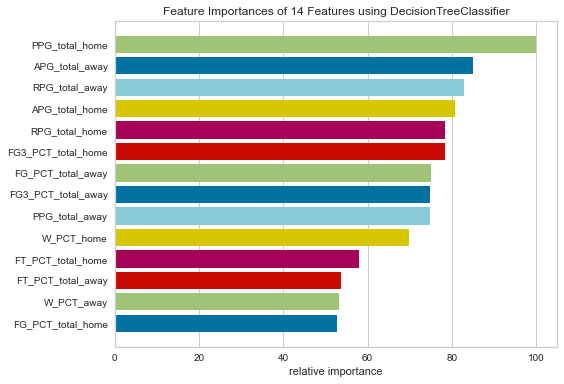

---------------------------------------------
Mean accuracy: 0.625820894297938
Max accuracy: 0.6382978723404256
Min accuracy: 0.6058763931104356
i=10


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       328
           1       0.57      0.57      0.57       307

    accuracy                           0.59       635
   macro avg       0.59      0.59      0.59       635
weighted avg       0.59      0.59      0.59       635



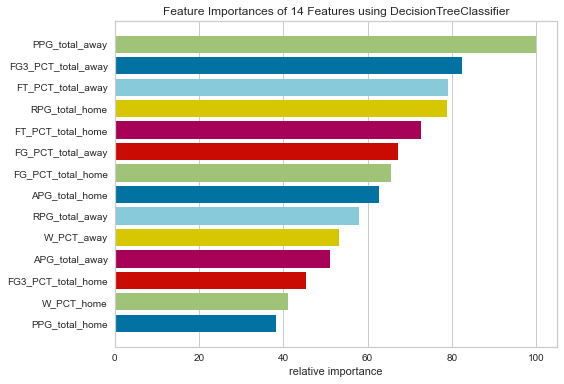

---------------------------------------------
i=11


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       332
           1       0.56      0.56      0.56       303

    accuracy                           0.58       635
   macro avg       0.58      0.58      0.58       635
weighted avg       0.58      0.58      0.58       635



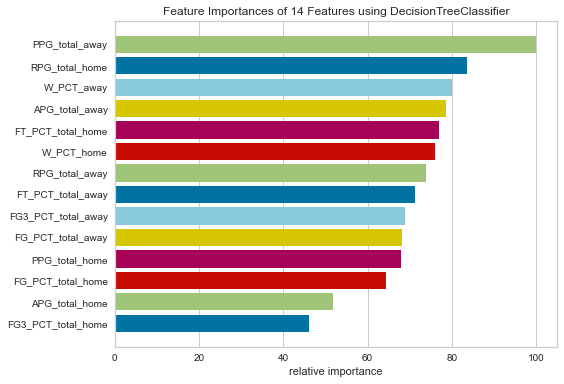

---------------------------------------------
i=12


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       347
           1       0.55      0.58      0.57       288

    accuracy                           0.60       635
   macro avg       0.59      0.59      0.59       635
weighted avg       0.60      0.60      0.60       635



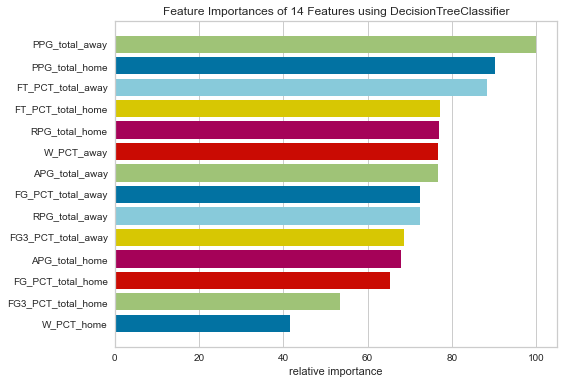

---------------------------------------------
i=13


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       331
           1       0.55      0.55      0.55       303

    accuracy                           0.57       634
   macro avg       0.57      0.57      0.57       634
weighted avg       0.57      0.57      0.57       634



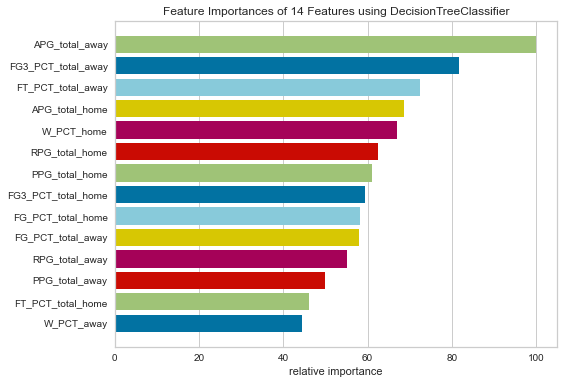

---------------------------------------------
i=14


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       338
           1       0.61      0.56      0.59       296

    accuracy                           0.63       634
   macro avg       0.63      0.63      0.63       634
weighted avg       0.63      0.63      0.63       634



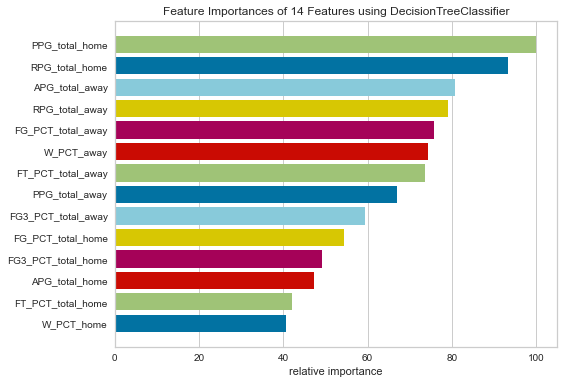

---------------------------------------------
Mean accuracy: 0.5829007178519089
Max accuracy: 0.5952755905511811
Min accuracy: 0.5678233438485805
i=15


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.60      0.56      0.58       312
           1       0.60      0.63      0.61       316

    accuracy                           0.60       628
   macro avg       0.60      0.60      0.60       628
weighted avg       0.60      0.60      0.60       628



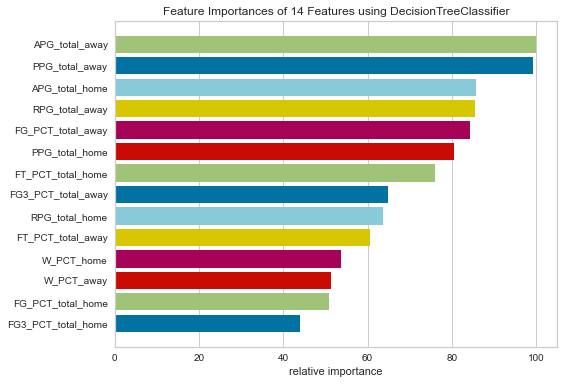

---------------------------------------------
i=16


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.56      0.60      0.58       299
           1       0.61      0.58      0.59       328

    accuracy                           0.59       627
   macro avg       0.59      0.59      0.59       627
weighted avg       0.59      0.59      0.59       627



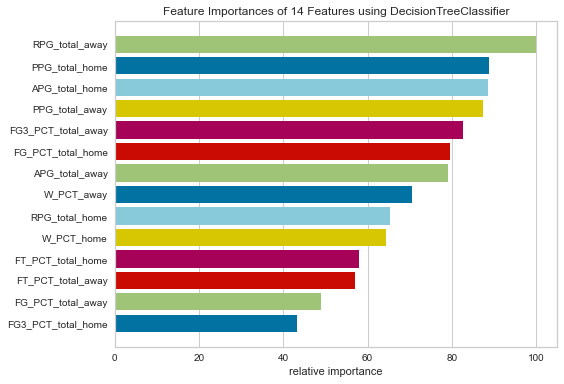

---------------------------------------------
i=17


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       327
           1       0.55      0.56      0.56       300

    accuracy                           0.57       627
   macro avg       0.57      0.57      0.57       627
weighted avg       0.57      0.57      0.57       627



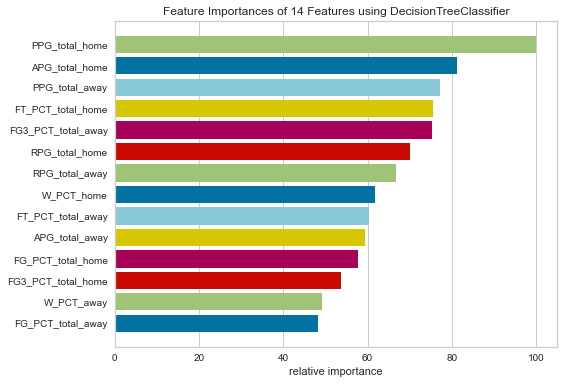

---------------------------------------------
i=18


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       300
           1       0.62      0.62      0.62       327

    accuracy                           0.60       627
   macro avg       0.60      0.60      0.60       627
weighted avg       0.60      0.60      0.60       627



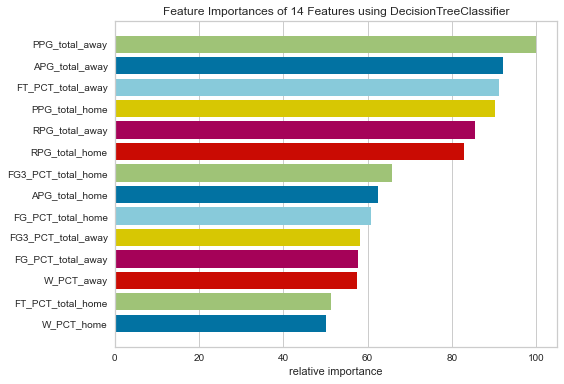

---------------------------------------------
i=19


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.55      0.55       312
           1       0.56      0.57      0.57       315

    accuracy                           0.56       627
   macro avg       0.56      0.56      0.56       627
weighted avg       0.56      0.56      0.56       627



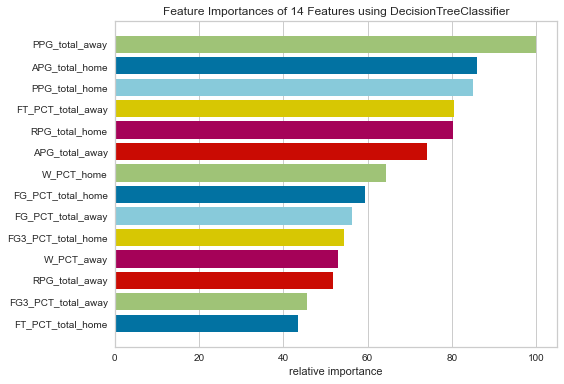

---------------------------------------------
Mean accuracy: 0.589872916222229
Max accuracy: 0.6044657097288676
Min accuracy: 0.5709728867623605
i=20


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       586
           1       0.50      0.53      0.51       394

    accuracy                           0.60       980
   macro avg       0.59      0.59      0.59       980
weighted avg       0.60      0.60      0.60       980



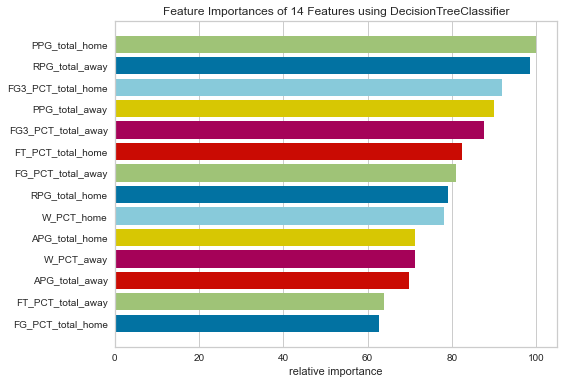

---------------------------------------------
i=21


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       582
           1       0.51      0.49      0.50       398

    accuracy                           0.60       980
   macro avg       0.59      0.59      0.59       980
weighted avg       0.60      0.60      0.60       980



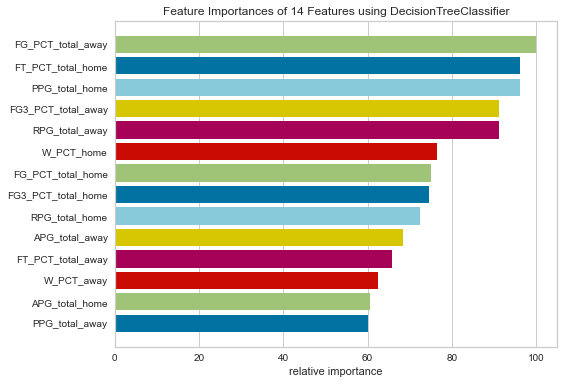

---------------------------------------------
i=22


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       562
           1       0.52      0.52      0.52       418

    accuracy                           0.59       980
   macro avg       0.58      0.58      0.58       980
weighted avg       0.59      0.59      0.59       980



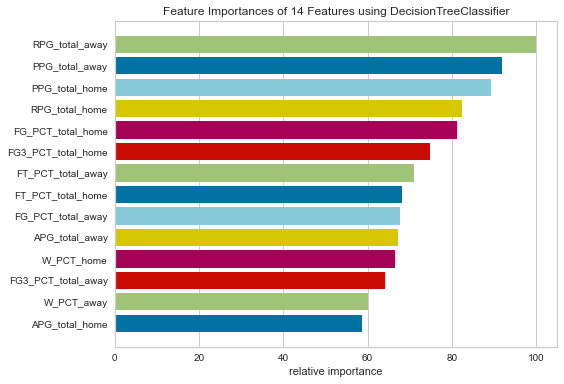

---------------------------------------------
i=23


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       590
           1       0.53      0.53      0.53       389

    accuracy                           0.62       979
   macro avg       0.61      0.61      0.61       979
weighted avg       0.62      0.62      0.62       979



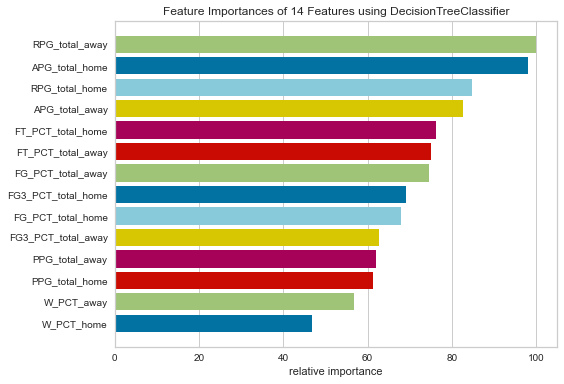

---------------------------------------------
i=24


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.66      0.69      0.68       563
           1       0.56      0.53      0.54       416

    accuracy                           0.62       979
   macro avg       0.61      0.61      0.61       979
weighted avg       0.62      0.62      0.62       979



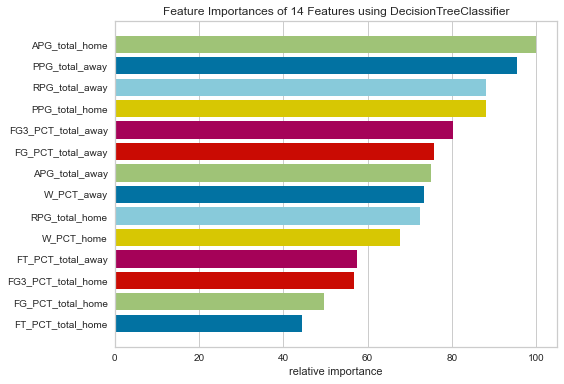

---------------------------------------------
Mean accuracy: 0.6052612515895021
Max accuracy: 0.6241062308478039
Min accuracy: 0.5938775510204082
i=25


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       487
           1       0.48      0.46      0.47       349

    accuracy                           0.57       836
   macro avg       0.56      0.56      0.56       836
weighted avg       0.57      0.57      0.57       836



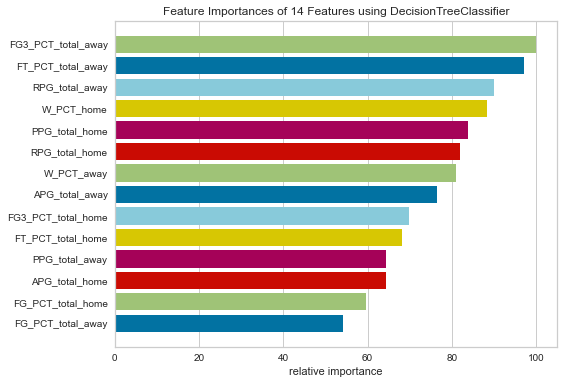

---------------------------------------------
i=26


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.64      0.70      0.67       467
           1       0.57      0.51      0.54       369

    accuracy                           0.62       836
   macro avg       0.61      0.60      0.60       836
weighted avg       0.61      0.62      0.61       836



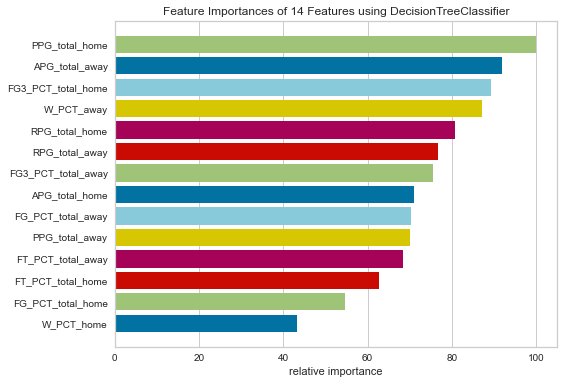

---------------------------------------------
i=27


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.61      0.66      0.64       471
           1       0.51      0.47      0.49       365

    accuracy                           0.57       836
   macro avg       0.56      0.56      0.56       836
weighted avg       0.57      0.57      0.57       836



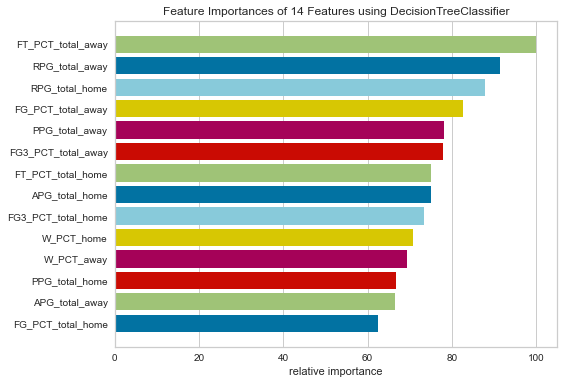

---------------------------------------------
i=28


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       508
           1       0.49      0.53      0.51       328

    accuracy                           0.60       836
   macro avg       0.58      0.59      0.58       836
weighted avg       0.60      0.60      0.60       836



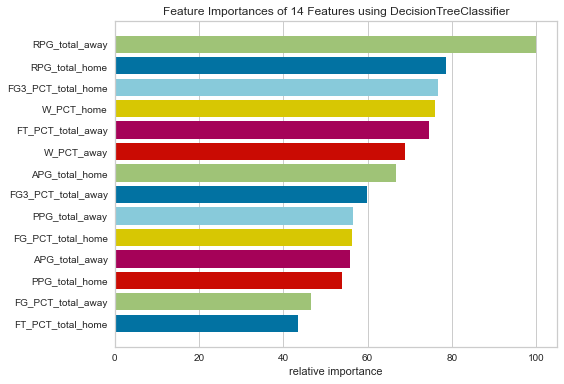

---------------------------------------------
i=29


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.63      0.68      0.66       458
           1       0.57      0.52      0.55       378

    accuracy                           0.61       836
   macro avg       0.60      0.60      0.60       836
weighted avg       0.61      0.61      0.61       836



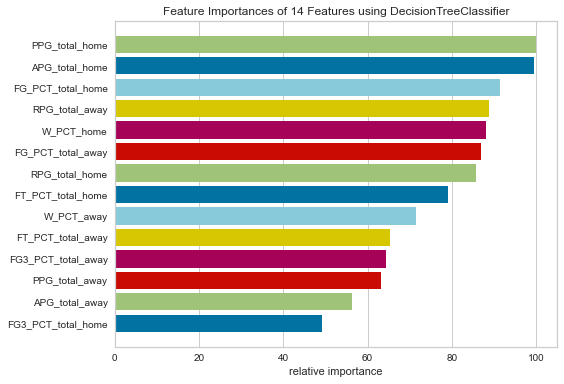

---------------------------------------------
Mean accuracy: 0.5894138755980861
Max accuracy: 0.6160287081339713
Min accuracy: 0.5705741626794258


In [26]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {'criterion':['gini','entropy']})

In [27]:
# plt.figure(figsize=(15,10))
# t = plot_tree(decision_tree_clf)

## Try prune max depth

i=0
WINNER:

Best decision tree accuracy ({'max_depth': 421, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       880
           1       0.50      0.53      0.51       495

    accuracy                           0.64      1375
   macro avg       0.61      0.62      0.62      1375
weighted avg       0.65      0.64      0.64      1375



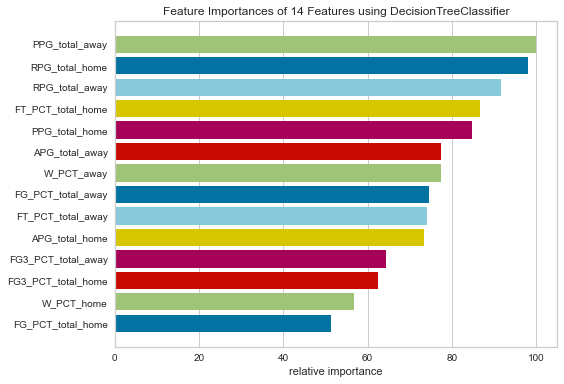

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'max_depth': 190, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       860
           1       0.50      0.50      0.50       515

    accuracy                           0.62      1375
   macro avg       0.60      0.60      0.60      1375
weighted avg       0.62      0.62      0.62      1375



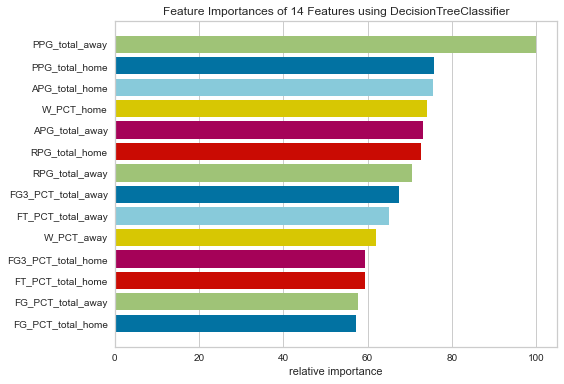

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'max_depth': 560, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       861
           1       0.52      0.48      0.50       514

    accuracy                           0.64      1375
   macro avg       0.61      0.61      0.61      1375
weighted avg       0.63      0.64      0.63      1375



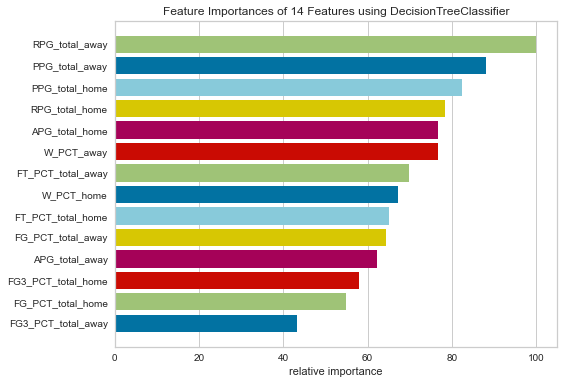

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'max_depth': 669, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       870
           1       0.51      0.53      0.52       505

    accuracy                           0.64      1375
   macro avg       0.62      0.62      0.62      1375
weighted avg       0.64      0.64      0.64      1375



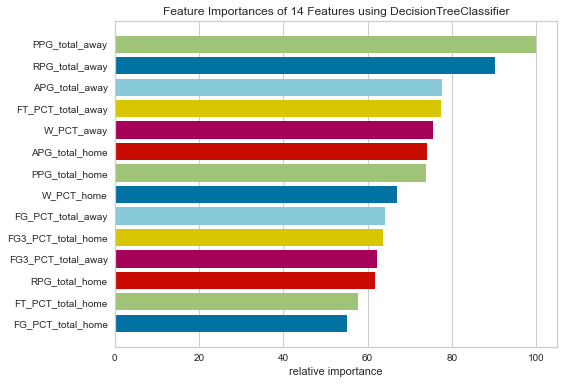

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'max_depth': 275, 'criterion': 'gini'}): 0.67
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       876
           1       0.56      0.51      0.53       499

    accuracy                           0.67      1375
   macro avg       0.64      0.64      0.64      1375
weighted avg       0.67      0.67      0.67      1375



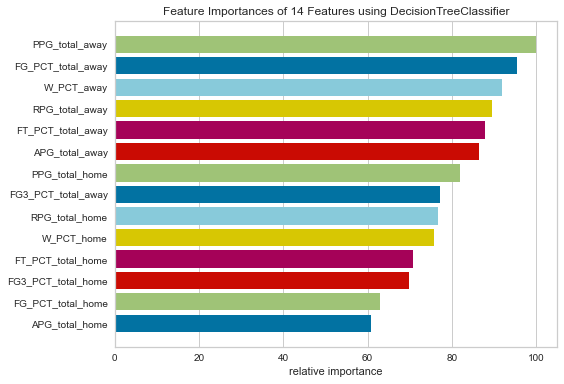

---------------------------------------------
Mean accuracy: 0.6363636363636364
Max accuracy: 0.6429090909090909
Min accuracy: 0.6225454545454545
i=5
FGP:

Best decision tree accuracy ({'max_depth': 817, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       591
           1       0.54      0.52      0.53       397

    accuracy                           0.63       988
   macro avg       0.61      0.61      0.61       988
weighted avg       0.62      0.63      0.63       988



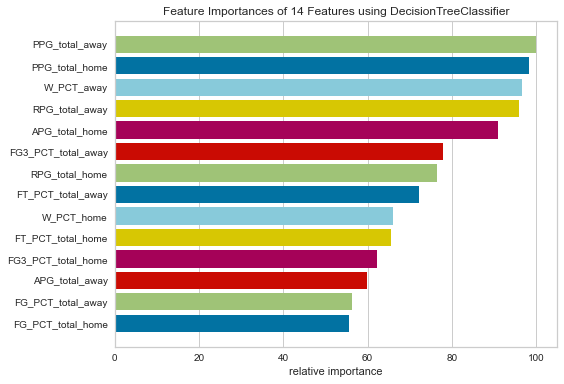

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'max_depth': 310, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.71      0.68      0.70       612
           1       0.51      0.54      0.53       376

    accuracy                           0.63       988
   macro avg       0.61      0.61      0.61       988
weighted avg       0.63      0.63      0.63       988



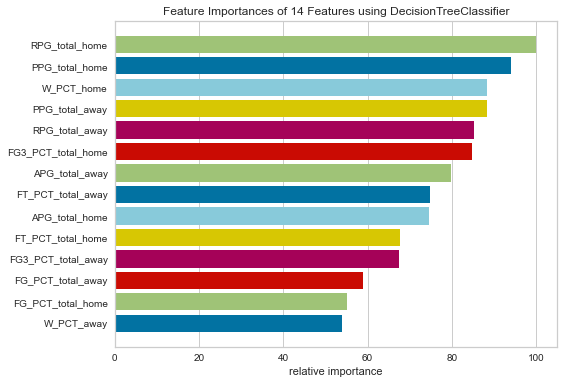

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'max_depth': 471, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       563
           1       0.55      0.52      0.53       425

    accuracy                           0.61       988
   macro avg       0.60      0.60      0.60       988
weighted avg       0.61      0.61      0.61       988



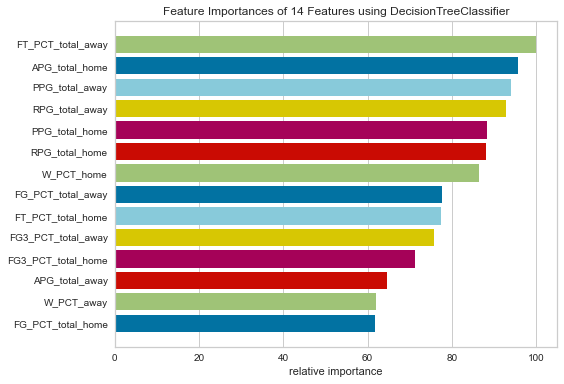

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'max_depth': 122, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       613
           1       0.52      0.55      0.53       375

    accuracy                           0.63       988
   macro avg       0.61      0.62      0.62       988
weighted avg       0.64      0.63      0.64       988



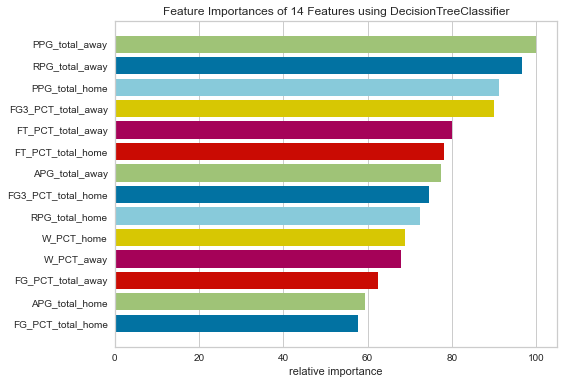

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'max_depth': 95, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       572
           1       0.56      0.52      0.54       415

    accuracy                           0.63       987
   macro avg       0.61      0.61      0.61       987
weighted avg       0.62      0.63      0.62       987



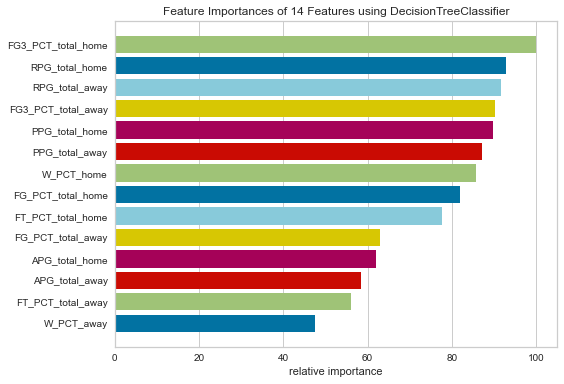

---------------------------------------------
Mean accuracy: 0.6255060728744939
Max accuracy: 0.6336032388663968
Min accuracy: 0.6123481781376519
i=10
FG3:

Best decision tree accuracy ({'max_depth': 652, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.58      0.63      0.61       318
           1       0.59      0.55      0.57       315

    accuracy                           0.59       633
   macro avg       0.59      0.59      0.59       633
weighted avg       0.59      0.59      0.59       633



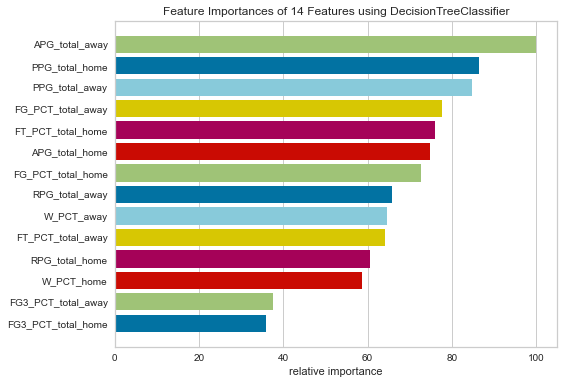

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'max_depth': 59, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       334
           1       0.60      0.60      0.60       299

    accuracy                           0.62       633
   macro avg       0.62      0.62      0.62       633
weighted avg       0.62      0.62      0.62       633



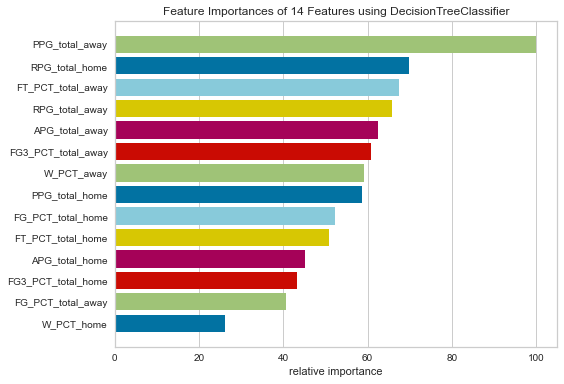

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'max_depth': 261, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       349
           1       0.55      0.57      0.56       284

    accuracy                           0.60       633
   macro avg       0.59      0.59      0.59       633
weighted avg       0.60      0.60      0.60       633



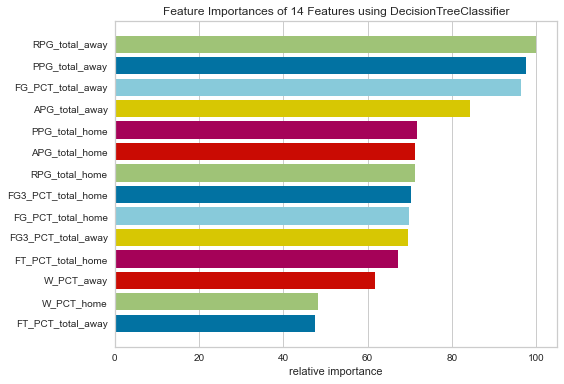

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'max_depth': 380, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       325
           1       0.60      0.60      0.60       307

    accuracy                           0.61       632
   macro avg       0.61      0.61      0.61       632
weighted avg       0.61      0.61      0.61       632



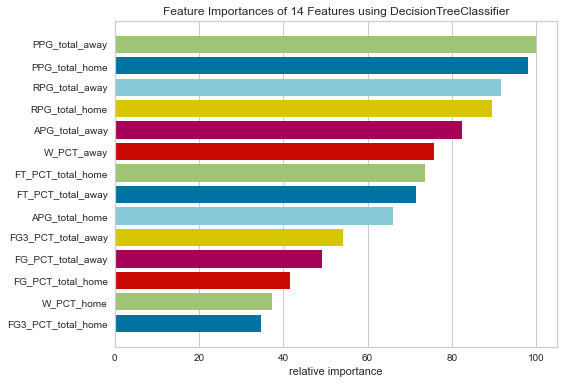

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'max_depth': 26, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.61      0.66      0.63       334
           1       0.58      0.52      0.55       298

    accuracy                           0.59       632
   macro avg       0.59      0.59      0.59       632
weighted avg       0.59      0.59      0.59       632



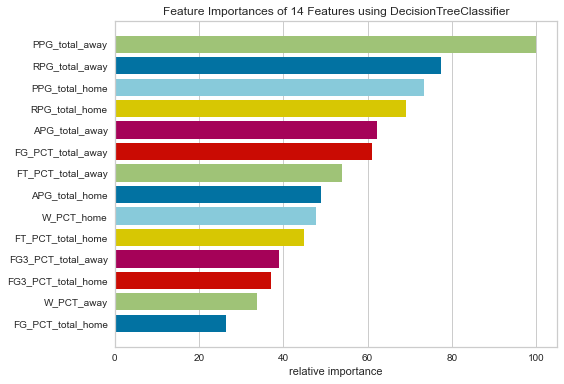

---------------------------------------------
Mean accuracy: 0.6033211600375947
Max accuracy: 0.6192733017377567
Min accuracy: 0.5876777251184834
i=15
FT:

Best decision tree accuracy ({'max_depth': 395, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.55      0.60      0.57       300
           1       0.60      0.55      0.57       328

    accuracy                           0.57       628
   macro avg       0.57      0.57      0.57       628
weighted avg       0.57      0.57      0.57       628



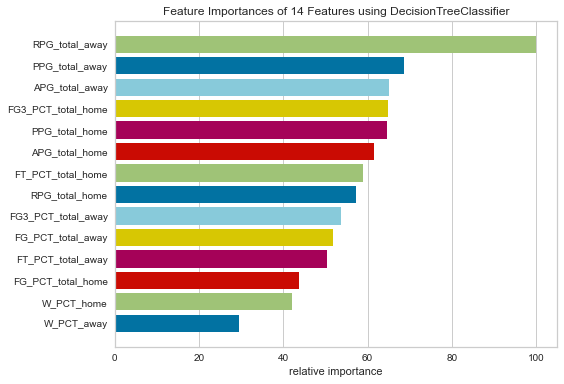

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'max_depth': 277, 'criterion': 'entropy'}): 0.56
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       307
           1       0.57      0.56      0.57       321

    accuracy                           0.56       628
   macro avg       0.56      0.56      0.56       628
weighted avg       0.56      0.56      0.56       628



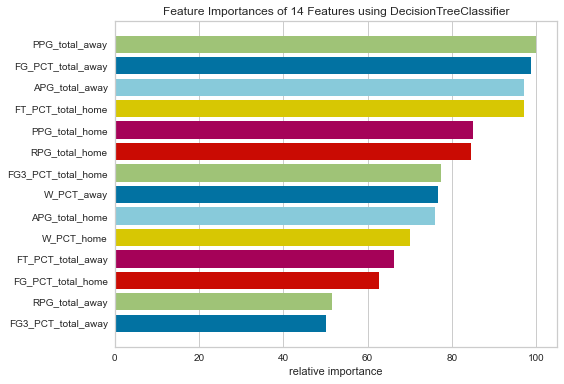

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'max_depth': 486, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.61      0.60      0.60       330
           1       0.56      0.57      0.57       298

    accuracy                           0.59       628
   macro avg       0.59      0.59      0.59       628
weighted avg       0.59      0.59      0.59       628



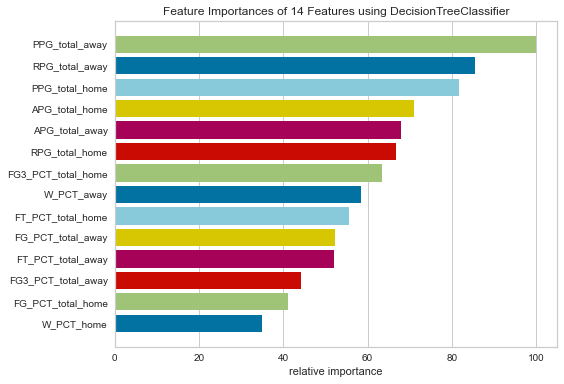

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'max_depth': 461, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.57      0.62      0.59       298
           1       0.62      0.57      0.60       329

    accuracy                           0.59       627
   macro avg       0.60      0.60      0.59       627
weighted avg       0.60      0.59      0.60       627



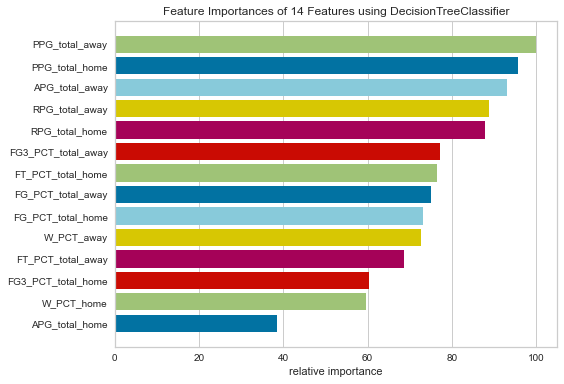

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'max_depth': 775, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.60      0.58      0.59       310
           1       0.60      0.62      0.61       317

    accuracy                           0.60       627
   macro avg       0.60      0.60      0.60       627
weighted avg       0.60      0.60      0.60       627



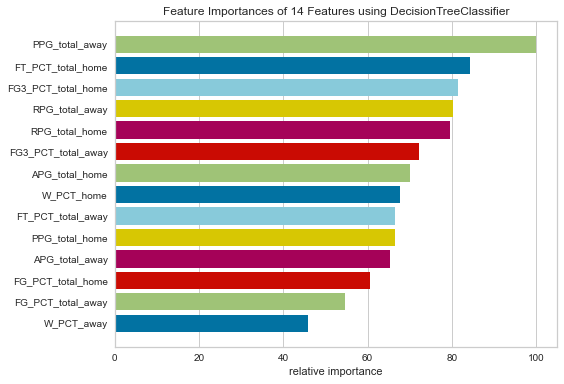

---------------------------------------------
Mean accuracy: 0.5782622994951188
Max accuracy: 0.594896331738437
Min accuracy: 0.5605095541401274
i=20
AST:

Best decision tree accuracy ({'max_depth': 937, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.66      0.69      0.68       559
           1       0.55      0.52      0.53       408

    accuracy                           0.62       967
   macro avg       0.61      0.60      0.61       967
weighted avg       0.62      0.62      0.62       967



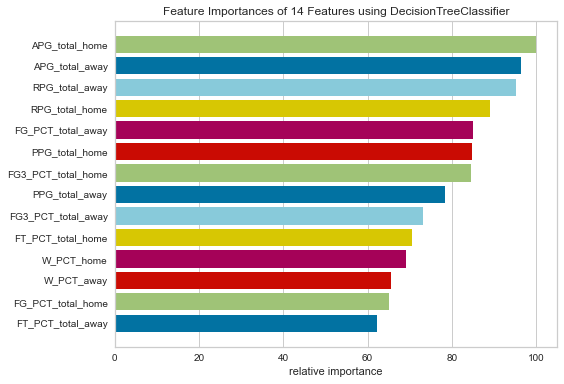

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'max_depth': 661, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       576
           1       0.55      0.58      0.57       390

    accuracy                           0.64       966
   macro avg       0.63      0.63      0.63       966
weighted avg       0.64      0.64      0.64       966



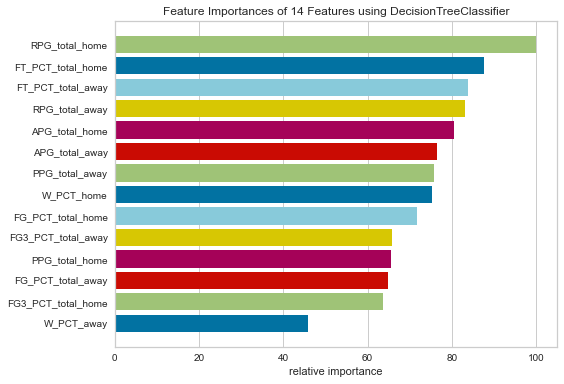

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'max_depth': 417, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.62      0.67      0.65       552
           1       0.51      0.46      0.49       414

    accuracy                           0.58       966
   macro avg       0.57      0.57      0.57       966
weighted avg       0.58      0.58      0.58       966



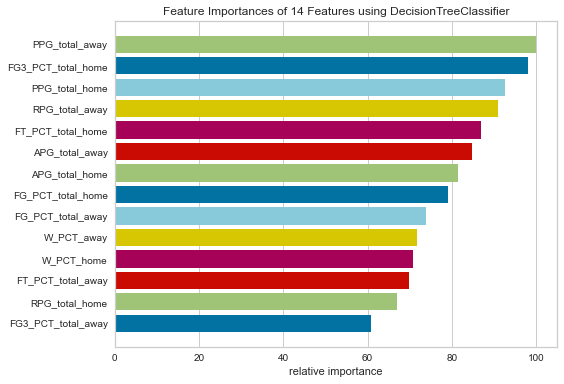

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'max_depth': 98, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       593
           1       0.54      0.56      0.55       373

    accuracy                           0.65       966
   macro avg       0.63      0.63      0.63       966
weighted avg       0.65      0.65      0.65       966



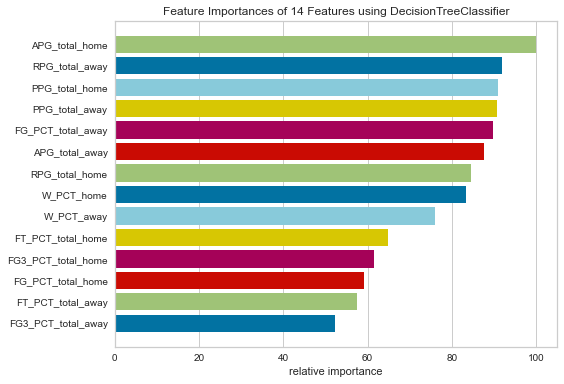

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'max_depth': 498, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       544
           1       0.55      0.53      0.54       422

    accuracy                           0.61       966
   macro avg       0.60      0.60      0.60       966
weighted avg       0.60      0.61      0.60       966



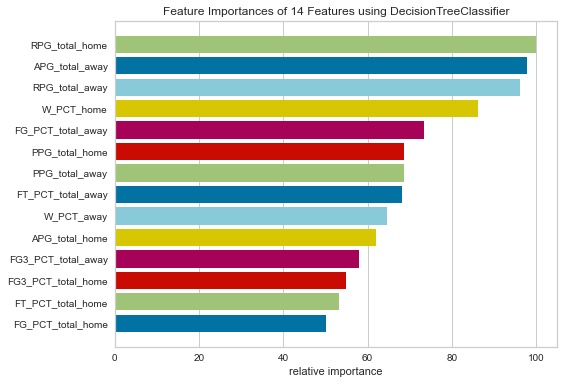

---------------------------------------------
Mean accuracy: 0.6214755674312349
Max accuracy: 0.6459627329192547
Min accuracy: 0.5807453416149069
i=25
REB:

Best decision tree accuracy ({'max_depth': 965, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.64      0.65      0.65       474
           1       0.52      0.52      0.52       351

    accuracy                           0.59       825
   macro avg       0.58      0.58      0.58       825
weighted avg       0.59      0.59      0.59       825



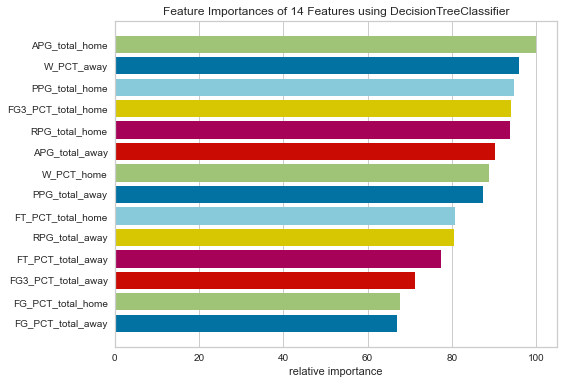

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'max_depth': 482, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.60      0.63      0.61       464
           1       0.49      0.45      0.47       360

    accuracy                           0.55       824
   macro avg       0.54      0.54      0.54       824
weighted avg       0.55      0.55      0.55       824



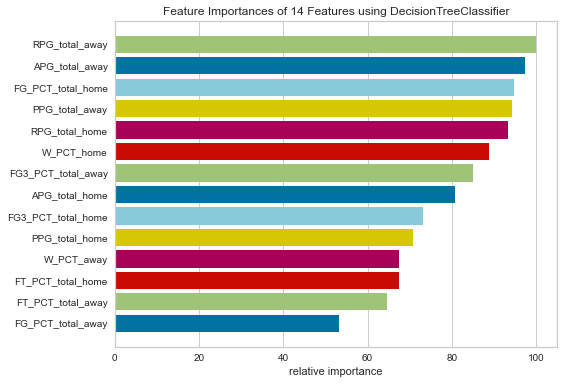

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'max_depth': 176, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.64      0.63      0.63       463
           1       0.53      0.54      0.54       361

    accuracy                           0.59       824
   macro avg       0.58      0.58      0.58       824
weighted avg       0.59      0.59      0.59       824



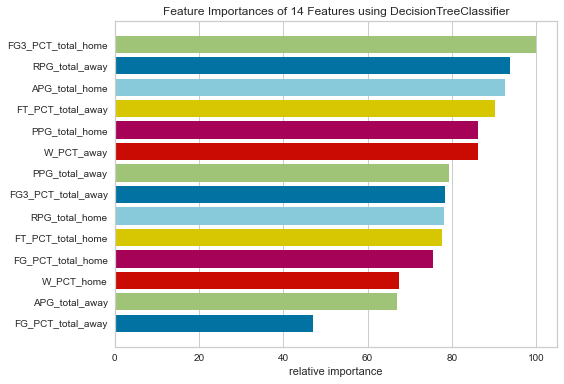

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'max_depth': 377, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       489
           1       0.53      0.52      0.53       335

    accuracy                           0.62       824
   macro avg       0.60      0.60      0.60       824
weighted avg       0.62      0.62      0.62       824



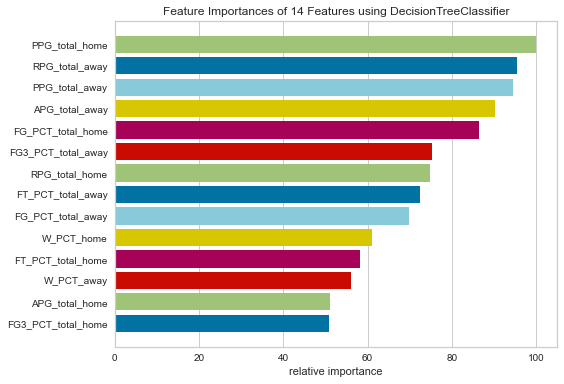

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'max_depth': 376, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       457
           1       0.53      0.47      0.50       367

    accuracy                           0.58       824
   macro avg       0.57      0.57      0.57       824
weighted avg       0.58      0.58      0.58       824



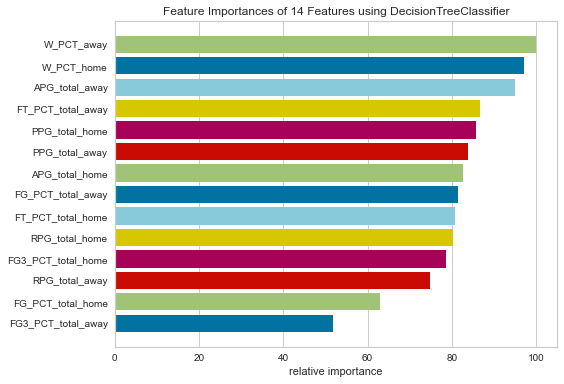

---------------------------------------------
Mean accuracy: 0.5881093704030597
Max accuracy: 0.6189320388349514
Min accuracy: 0.5521844660194175


In [30]:
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_depth': [*range(4,1000)],
    'criterion': ['gini', 'entropy'],
})

## Try prune impurity decrease

i=0
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.05, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       855
           1       0.00      0.00      0.00       506

    accuracy                           0.63      1361
   macro avg       0.31      0.50      0.39      1361
weighted avg       0.39      0.63      0.48      1361



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

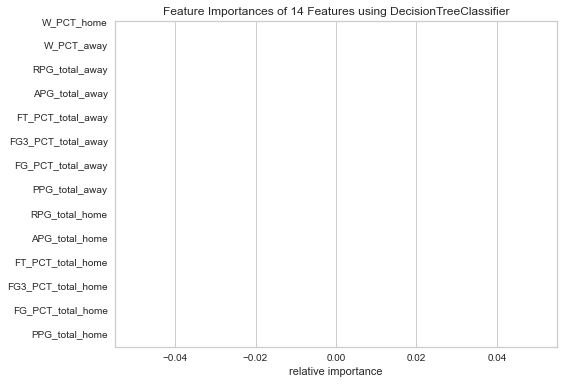

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.7, 'criterion': 'entropy'}): 0.62
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       847
           1       0.00      0.00      0.00       514

    accuracy                           0.62      1361
   macro avg       0.31      0.50      0.38      1361
weighted avg       0.39      0.62      0.48      1361



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

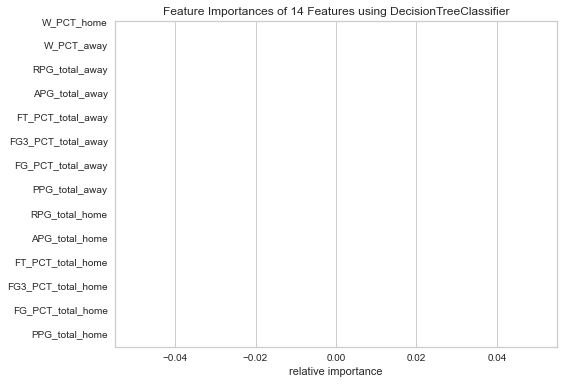

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.6, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.78       862
           1       0.00      0.00      0.00       499

    accuracy                           0.63      1361
   macro avg       0.32      0.50      0.39      1361
weighted avg       0.40      0.63      0.49      1361



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

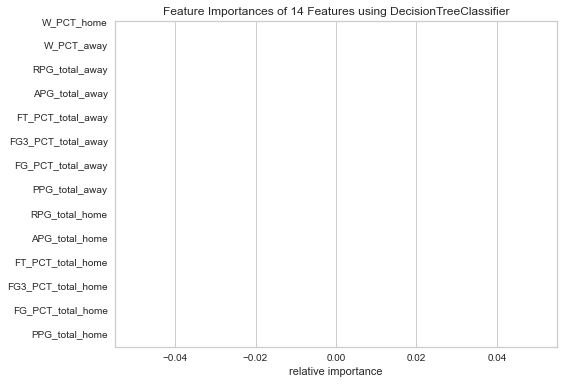

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.5, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       857
           1       0.00      0.00      0.00       504

    accuracy                           0.63      1361
   macro avg       0.31      0.50      0.39      1361
weighted avg       0.40      0.63      0.49      1361



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

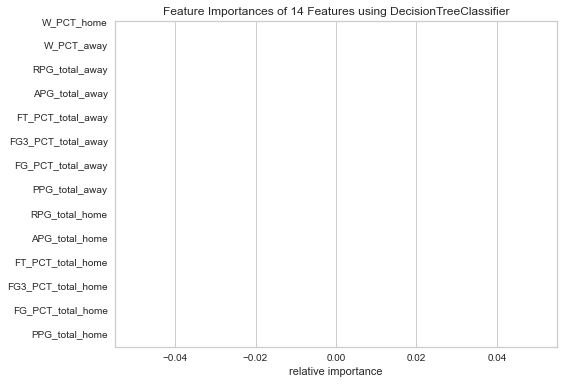

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'min_impurity_decrease': 0.3, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.63      1.00      0.78       863
           1       0.00      0.00      0.00       497

    accuracy                           0.63      1360
   macro avg       0.32      0.50      0.39      1360
weighted avg       0.40      0.63      0.49      1360



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

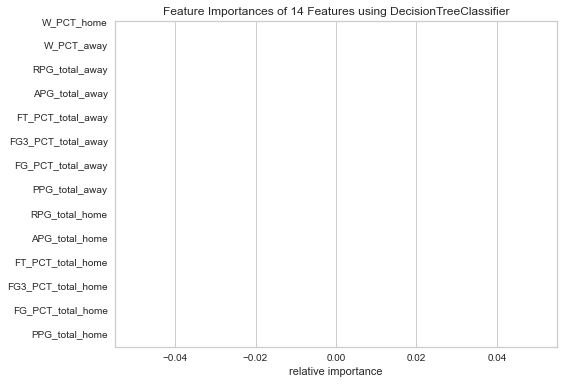

---------------------------------------------
Mean accuracy: 0.6283982365907421
Max accuracy: 0.633357825128582
Min accuracy: 0.6223365172667157
i=5
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.2, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.75       599
           1       0.00      0.00      0.00       389

    accuracy                           0.61       988
   macro avg       0.30      0.50      0.38       988
weighted avg       0.37      0.61      0.46       988



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

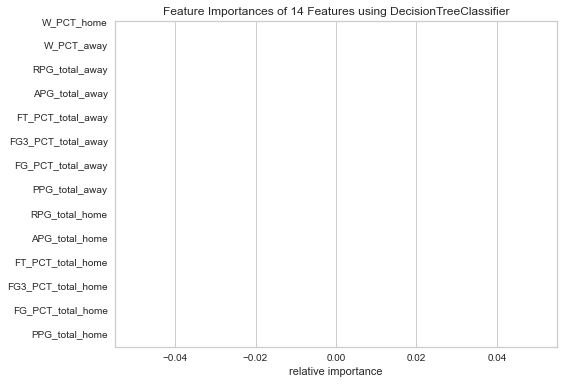

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.3, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       614
           1       0.00      0.00      0.00       374

    accuracy                           0.62       988
   macro avg       0.31      0.50      0.38       988
weighted avg       0.39      0.62      0.48       988



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

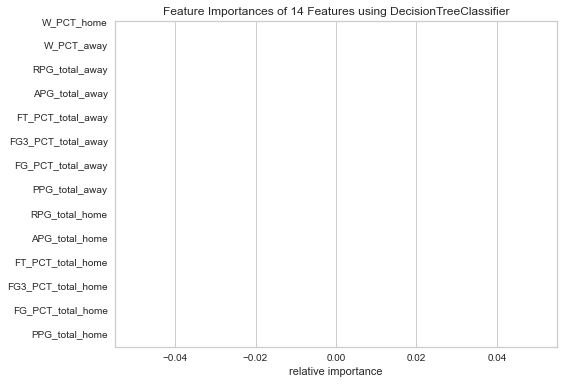

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.3, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       573
           1       0.00      0.00      0.00       414

    accuracy                           0.58       987
   macro avg       0.29      0.50      0.37       987
weighted avg       0.34      0.58      0.43       987



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

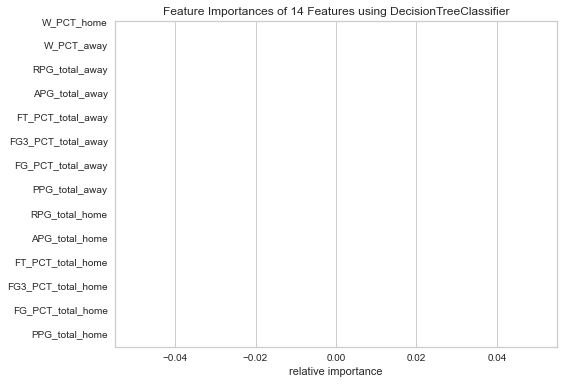

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.8, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       613
           1       0.00      0.00      0.00       374

    accuracy                           0.62       987
   macro avg       0.31      0.50      0.38       987
weighted avg       0.39      0.62      0.48       987



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

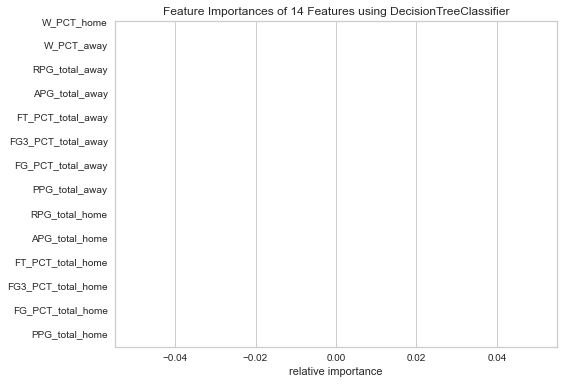

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'min_impurity_decrease': 0.75, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       574
           1       0.00      0.00      0.00       413

    accuracy                           0.58       987
   macro avg       0.29      0.50      0.37       987
weighted avg       0.34      0.58      0.43       987



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

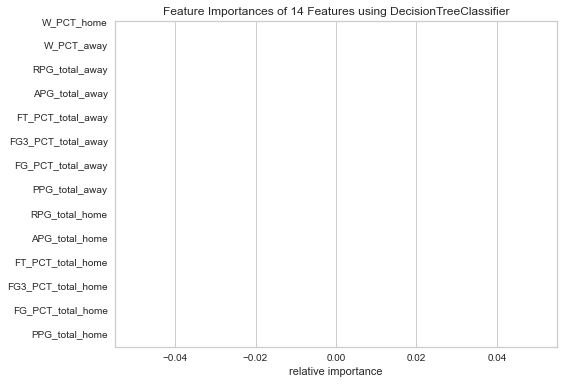

---------------------------------------------
Mean accuracy: 0.6073384668709417
Max accuracy: 0.6214574898785425
Min accuracy: 0.5805471124620061
i=10
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.2, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       328
           1       0.00      0.00      0.00       307

    accuracy                           0.52       635
   macro avg       0.26      0.50      0.34       635
weighted avg       0.27      0.52      0.35       635



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

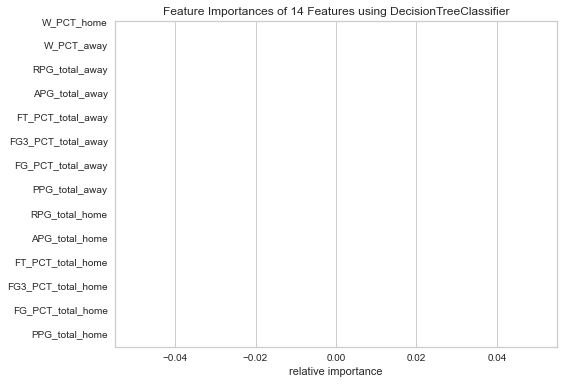

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.4, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.52      1.00      0.69       332
           1       0.00      0.00      0.00       303

    accuracy                           0.52       635
   macro avg       0.26      0.50      0.34       635
weighted avg       0.27      0.52      0.36       635



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

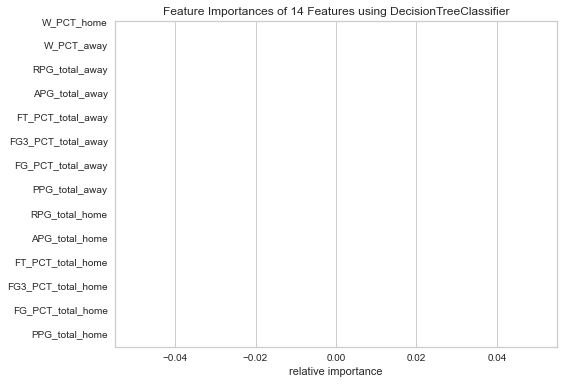

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.8, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       347
           1       0.00      0.00      0.00       288

    accuracy                           0.55       635
   macro avg       0.27      0.50      0.35       635
weighted avg       0.30      0.55      0.39       635



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

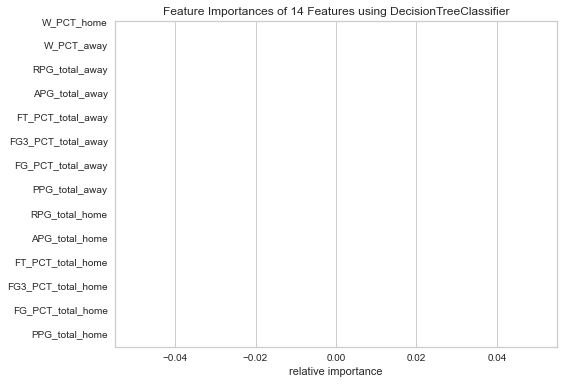

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.3, 'criterion': 'entropy'}): 0.52
              precision    recall  f1-score   support

           0       0.52      1.00      0.69       331
           1       0.00      0.00      0.00       303

    accuracy                           0.52       634
   macro avg       0.26      0.50      0.34       634
weighted avg       0.27      0.52      0.36       634



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

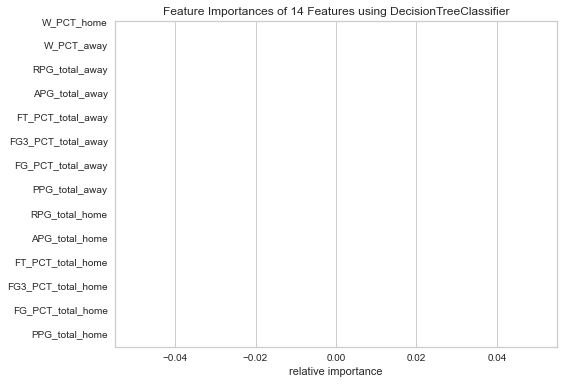

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'min_impurity_decrease': 0.8, 'criterion': 'entropy'}): 0.53
              precision    recall  f1-score   support

           0       0.53      1.00      0.70       338
           1       0.00      0.00      0.00       296

    accuracy                           0.53       634
   macro avg       0.27      0.50      0.35       634
weighted avg       0.28      0.53      0.37       634



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

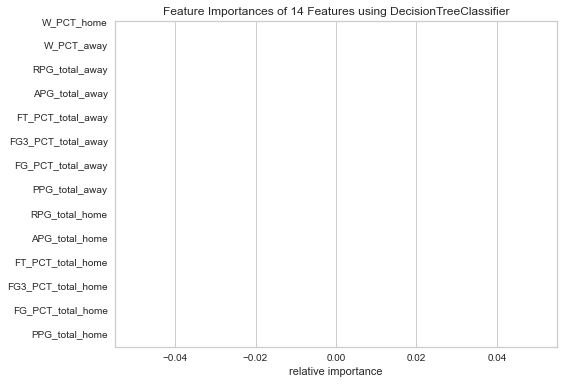

---------------------------------------------
Mean accuracy: 0.526977197645247
Max accuracy: 0.5464566929133858
Min accuracy: 0.5165354330708661
i=15
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.7, 'criterion': 'entropy'}): 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       312
           1       0.50      1.00      0.67       316

    accuracy                           0.50       628
   macro avg       0.25      0.50      0.33       628
weighted avg       0.25      0.50      0.34       628



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

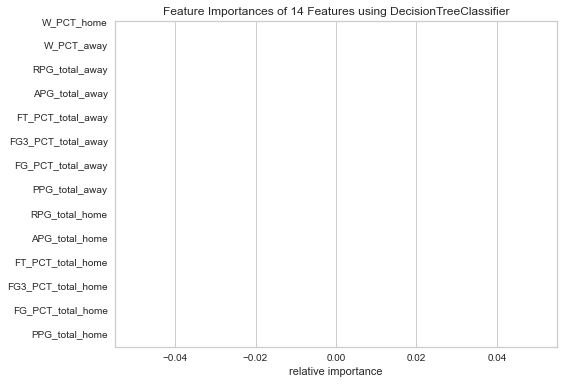

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.6, 'criterion': 'gini'}): 0.52
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       299
           1       0.52      1.00      0.69       328

    accuracy                           0.52       627
   macro avg       0.26      0.50      0.34       627
weighted avg       0.27      0.52      0.36       627



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

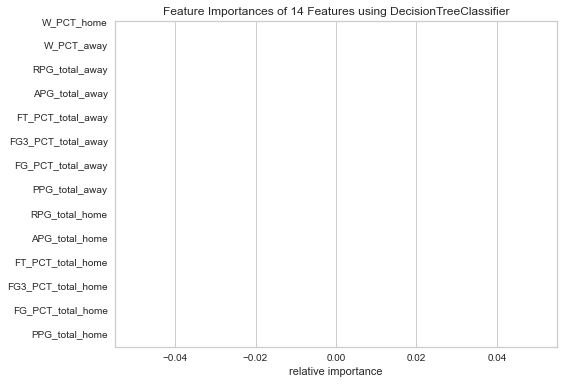

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       327
           1       0.55      0.56      0.56       300

    accuracy                           0.57       627
   macro avg       0.57      0.57      0.57       627
weighted avg       0.57      0.57      0.57       627



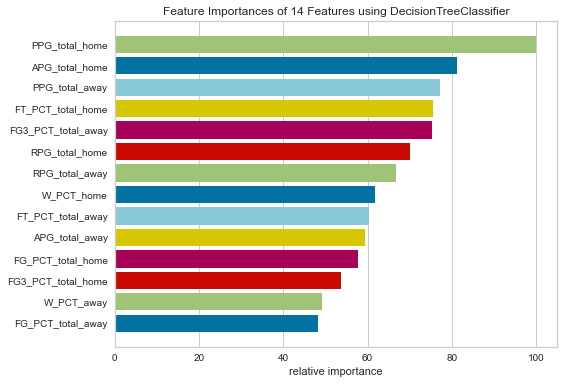

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.0, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.59      0.59      0.59       300
           1       0.62      0.62      0.62       327

    accuracy                           0.60       627
   macro avg       0.60      0.60      0.60       627
weighted avg       0.60      0.60      0.60       627



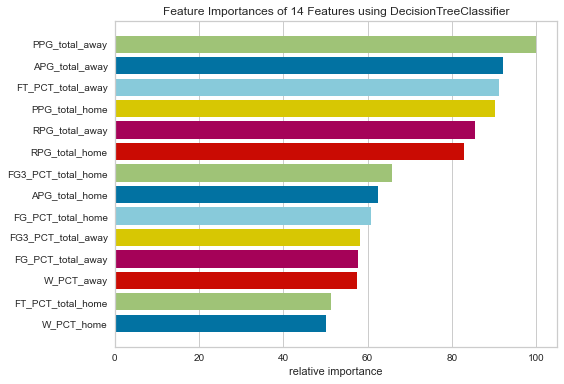

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'min_impurity_decrease': 0.35, 'criterion': 'gini'}): 0.50
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       312
           1       0.50      1.00      0.67       315

    accuracy                           0.50       627
   macro avg       0.25      0.50      0.33       627
weighted avg       0.25      0.50      0.34       627



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

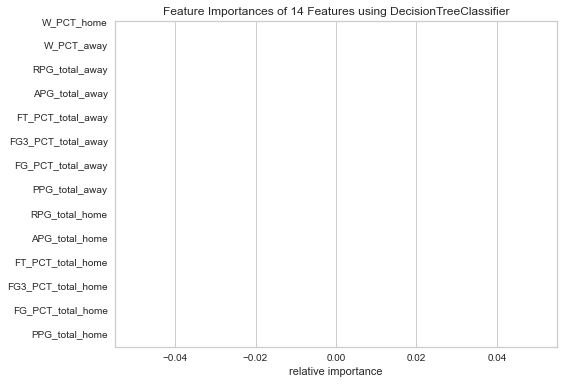

---------------------------------------------
Mean accuracy: 0.5504373266693079
Max accuracy: 0.6044657097288676
Min accuracy: 0.5031847133757962
i=20
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.2, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       586
           1       0.00      0.00      0.00       394

    accuracy                           0.60       980
   macro avg       0.30      0.50      0.37       980
weighted avg       0.36      0.60      0.45       980



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

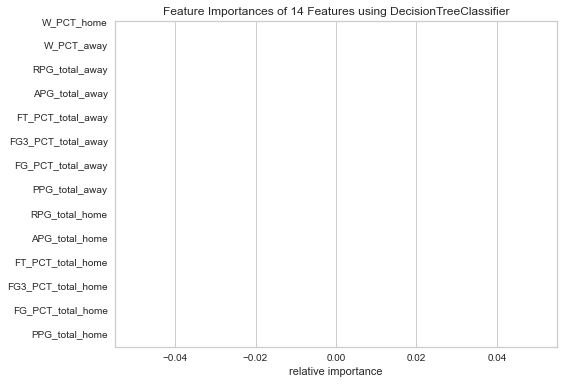

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.7, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.59      1.00      0.75       582
           1       0.00      0.00      0.00       398

    accuracy                           0.59       980
   macro avg       0.30      0.50      0.37       980
weighted avg       0.35      0.59      0.44       980



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

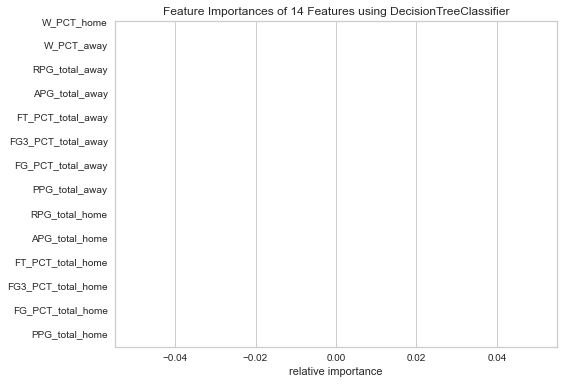

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.05, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       562
           1       0.00      0.00      0.00       418

    accuracy                           0.57       980
   macro avg       0.29      0.50      0.36       980
weighted avg       0.33      0.57      0.42       980



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

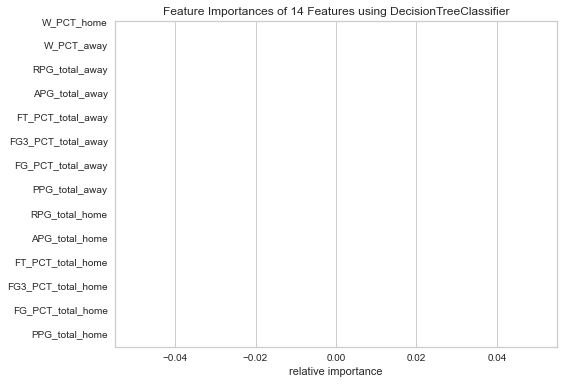

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.4, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       590
           1       0.00      0.00      0.00       389

    accuracy                           0.60       979
   macro avg       0.30      0.50      0.38       979
weighted avg       0.36      0.60      0.45       979



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

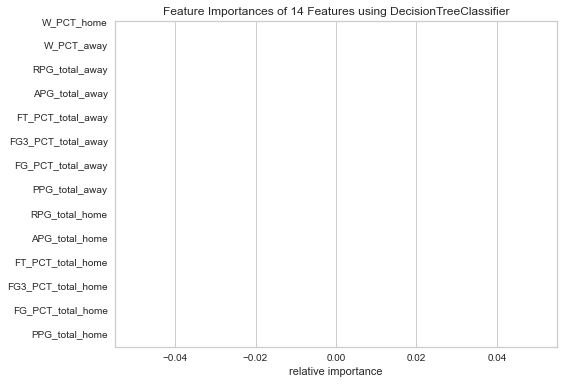

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'min_impurity_decrease': 0.5, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       563
           1       0.00      0.00      0.00       416

    accuracy                           0.58       979
   macro avg       0.29      0.50      0.37       979
weighted avg       0.33      0.58      0.42       979



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

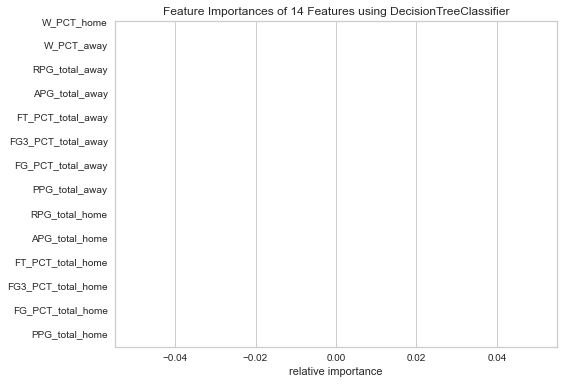

---------------------------------------------
Mean accuracy: 0.5919904734110192
Max accuracy: 0.6026557711950971
Min accuracy: 0.573469387755102
i=25
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.4, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       487
           1       0.00      0.00      0.00       349

    accuracy                           0.58       836
   macro avg       0.29      0.50      0.37       836
weighted avg       0.34      0.58      0.43       836



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

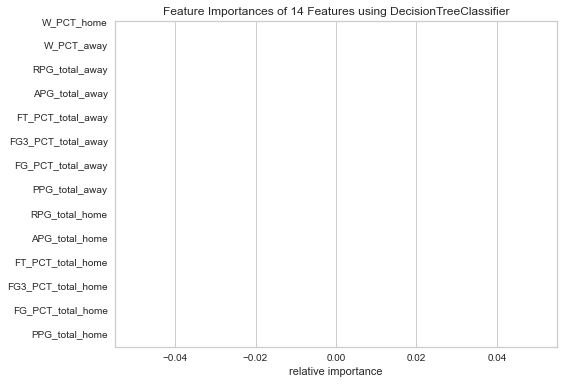

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.85, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       467
           1       0.00      0.00      0.00       369

    accuracy                           0.56       836
   macro avg       0.28      0.50      0.36       836
weighted avg       0.31      0.56      0.40       836



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

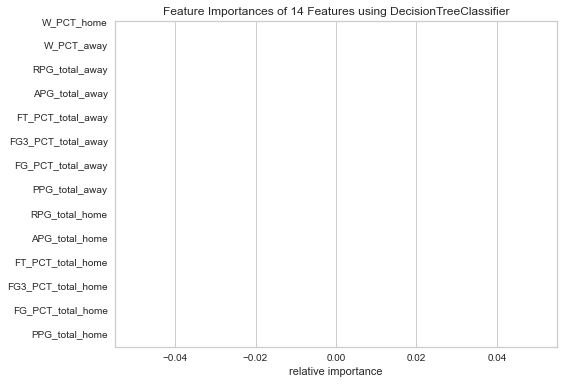

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.95, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       471
           1       0.00      0.00      0.00       365

    accuracy                           0.56       836
   macro avg       0.28      0.50      0.36       836
weighted avg       0.32      0.56      0.41       836



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

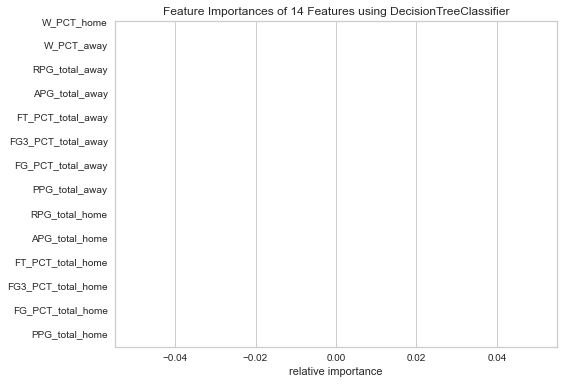

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.65, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       508
           1       0.00      0.00      0.00       328

    accuracy                           0.61       836
   macro avg       0.30      0.50      0.38       836
weighted avg       0.37      0.61      0.46       836



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

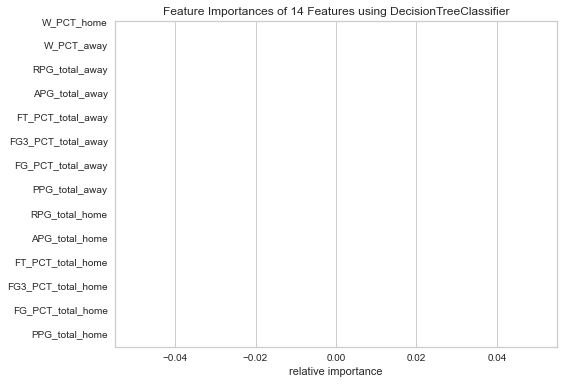

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'min_impurity_decrease': 0.85, 'criterion': 'entropy'}): 0.55
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       458
           1       0.00      0.00      0.00       378

    accuracy                           0.55       836
   macro avg       0.27      0.50      0.35       836
weighted avg       0.30      0.55      0.39       836



c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

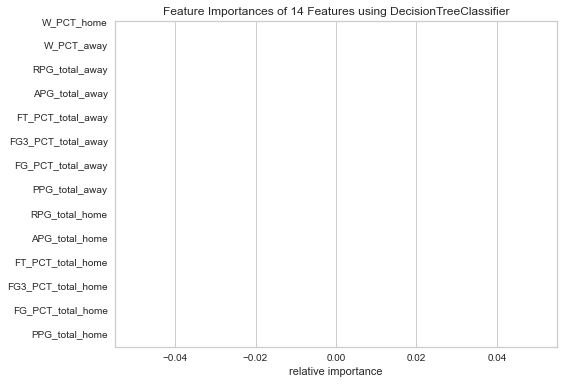

---------------------------------------------
Mean accuracy: 0.5780502392344498
Max accuracy: 0.6076555023923444
Min accuracy: 0.5586124401913876


In [29]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'min_impurity_decrease': [0.0,0.01],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'min_impurity_decrease': [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95],
    'criterion': ['gini', 'entropy'],
})
# print('Any non-zero min_impurity_decrease causes all classifications to be 1')

## Try prune max leaves

i=0
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 910, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       855
           1       0.53      0.51      0.52       506

    accuracy                           0.65      1361
   macro avg       0.62      0.62      0.62      1361
weighted avg       0.65      0.65      0.65      1361



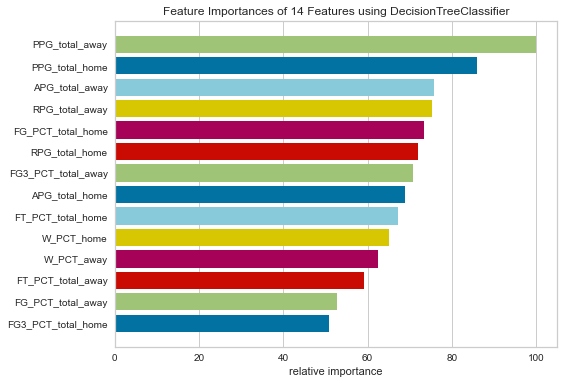

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 1782, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.70      0.75      0.73       847
           1       0.54      0.48      0.51       514

    accuracy                           0.65      1361
   macro avg       0.62      0.61      0.62      1361
weighted avg       0.64      0.65      0.64      1361



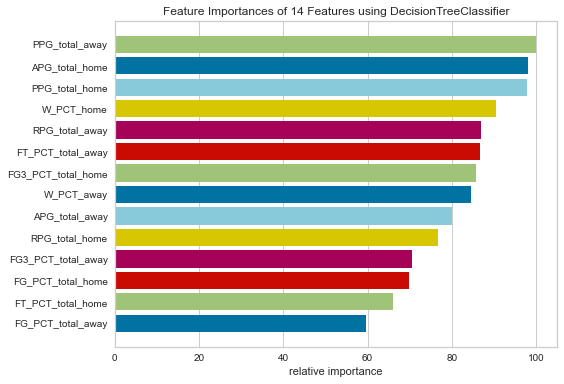

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 1932, 'criterion': 'gini'}): 0.66
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       862
           1       0.53      0.51      0.52       499

    accuracy                           0.66      1361
   macro avg       0.63      0.62      0.63      1361
weighted avg       0.65      0.66      0.65      1361



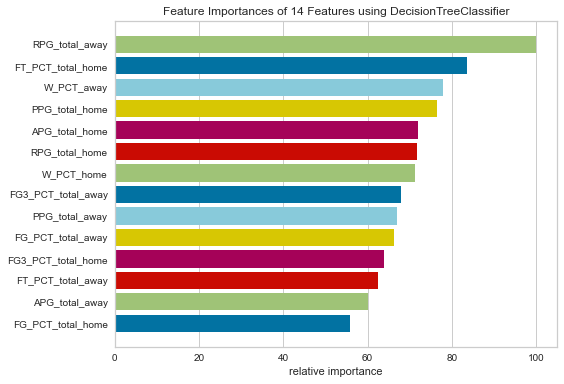

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 1208, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       857
           1       0.52      0.49      0.50       504

    accuracy                           0.64      1361
   macro avg       0.61      0.61      0.61      1361
weighted avg       0.64      0.64      0.64      1361



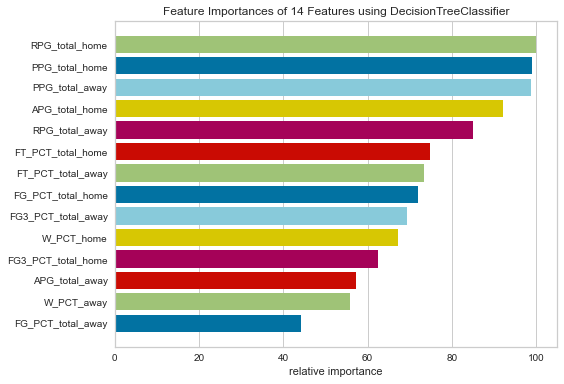

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'max_leaf_nodes': 1700, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       863
           1       0.52      0.49      0.50       497

    accuracy                           0.65      1360
   macro avg       0.62      0.61      0.61      1360
weighted avg       0.64      0.65      0.64      1360



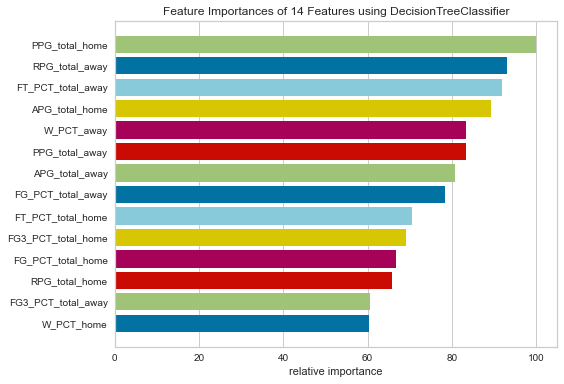

---------------------------------------------
Mean accuracy: 0.6482365907421015
Max accuracy: 0.6554004408523145
Min accuracy: 0.6407053637031594
i=5
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 898, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       599
           1       0.50      0.51      0.50       389

    accuracy                           0.60       988
   macro avg       0.59      0.59      0.59       988
weighted avg       0.60      0.60      0.60       988



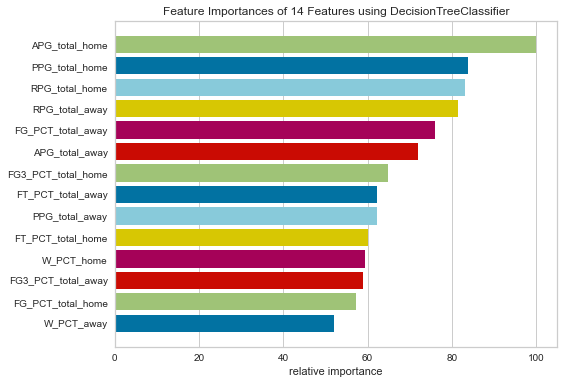

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 606, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       614
           1       0.50      0.49      0.49       374

    accuracy                           0.62       988
   macro avg       0.59      0.59      0.59       988
weighted avg       0.62      0.62      0.62       988



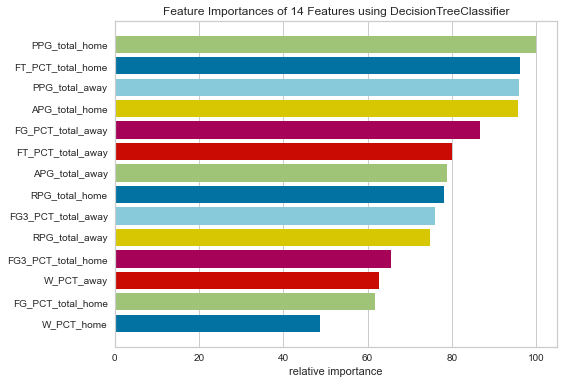

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 1932, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       573
           1       0.58      0.54      0.56       414

    accuracy                           0.65       987
   macro avg       0.63      0.63      0.63       987
weighted avg       0.64      0.65      0.64       987



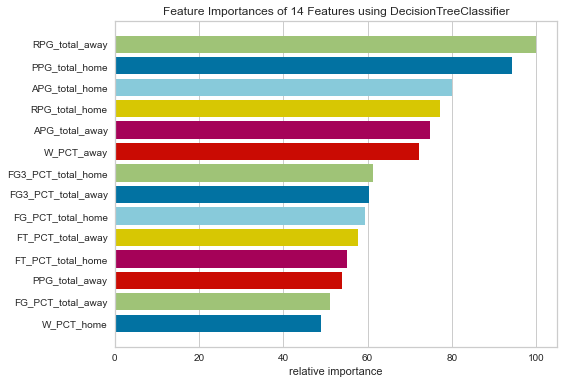

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 496, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       613
           1       0.51      0.56      0.54       374

    accuracy                           0.63       987
   macro avg       0.62      0.62      0.62       987
weighted avg       0.64      0.63      0.64       987



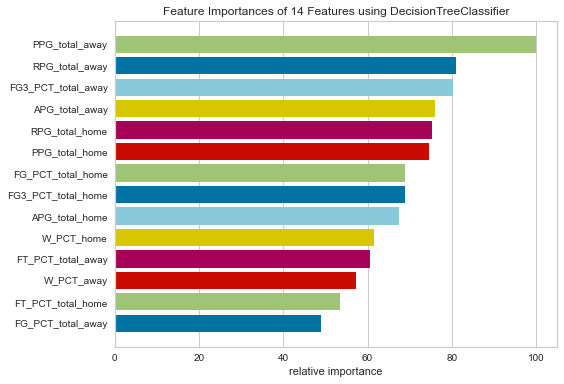

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'max_leaf_nodes': 994, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       574
           1       0.56      0.53      0.55       413

    accuracy                           0.63       987
   macro avg       0.62      0.62      0.62       987
weighted avg       0.63      0.63      0.63       987



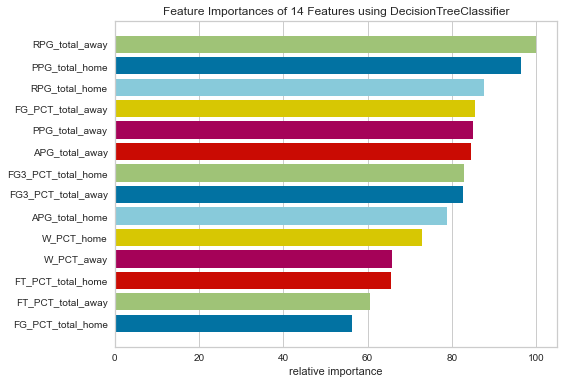

---------------------------------------------
Mean accuracy: 0.6250705015402664
Max accuracy: 0.6453900709219859
Min accuracy: 0.6032388663967612
i=10
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 256, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.58      0.59      0.58       328
           1       0.55      0.54      0.54       307

    accuracy                           0.57       635
   macro avg       0.56      0.56      0.56       635
weighted avg       0.57      0.57      0.57       635



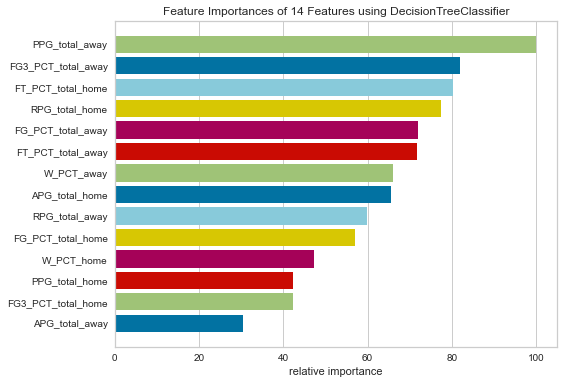

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 1160, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.62      0.64      0.63       332
           1       0.59      0.56      0.58       303

    accuracy                           0.61       635
   macro avg       0.61      0.60      0.60       635
weighted avg       0.61      0.61      0.61       635



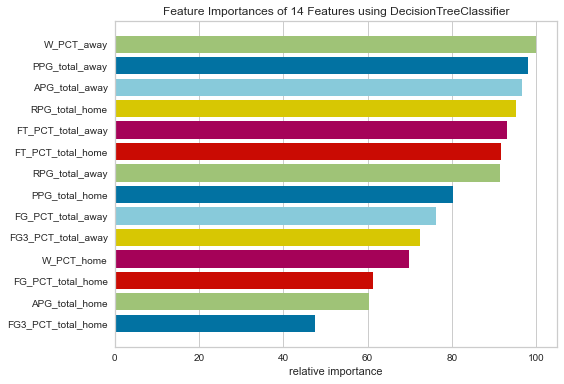

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 42, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.61      0.63      0.62       347
           1       0.54      0.52      0.53       288

    accuracy                           0.58       635
   macro avg       0.58      0.58      0.58       635
weighted avg       0.58      0.58      0.58       635



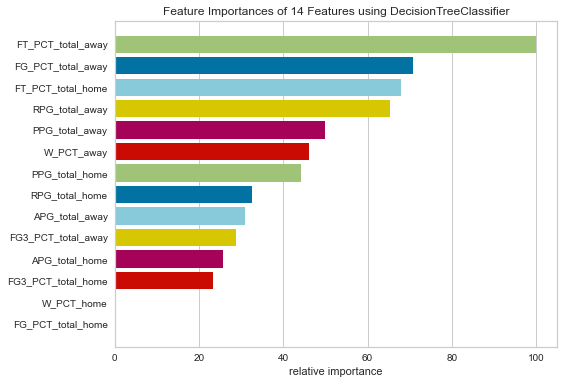

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 1078, 'criterion': 'entropy'}): 0.53
              precision    recall  f1-score   support

           0       0.56      0.52      0.54       331
           1       0.51      0.55      0.53       303

    accuracy                           0.53       634
   macro avg       0.54      0.54      0.53       634
weighted avg       0.54      0.53      0.53       634



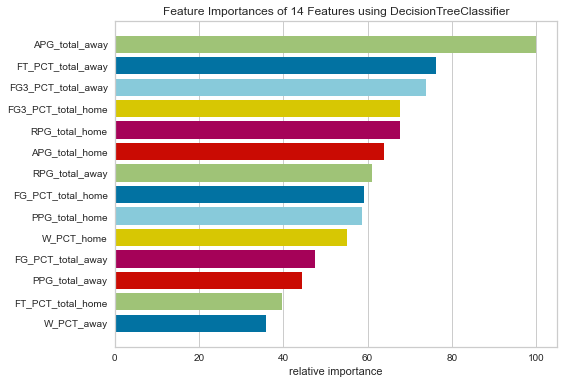

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'max_leaf_nodes': 1958, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.63      0.66      0.65       338
           1       0.59      0.55      0.57       296

    accuracy                           0.61       634
   macro avg       0.61      0.61      0.61       634
weighted avg       0.61      0.61      0.61       634



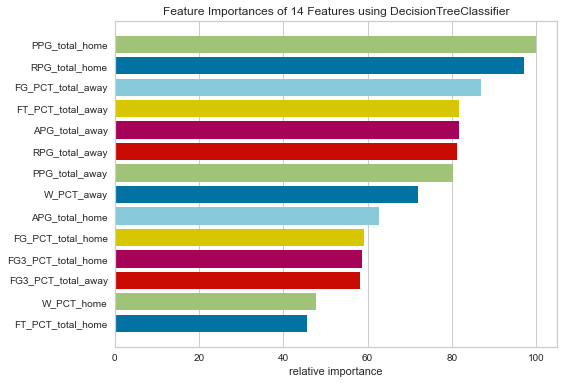

---------------------------------------------
Mean accuracy: 0.5722577560297075
Max accuracy: 0.6062992125984252
Min accuracy: 0.5347003154574133
i=15
FT:

Best decision tree accuracy ({'max_leaf_nodes': 168, 'criterion': 'gini'}): 0.57
              precision    recall  f1-score   support

           0       0.57      0.56      0.57       312
           1       0.58      0.59      0.58       316

    accuracy                           0.57       628
   macro avg       0.57      0.57      0.57       628
weighted avg       0.57      0.57      0.57       628



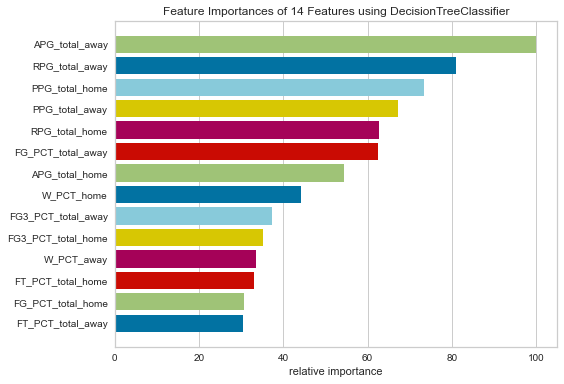

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'max_leaf_nodes': 1556, 'criterion': 'gini'}): 0.55
              precision    recall  f1-score   support

           0       0.53      0.56      0.55       299
           1       0.58      0.55      0.56       328

    accuracy                           0.55       627
   macro avg       0.55      0.55      0.55       627
weighted avg       0.55      0.55      0.55       627



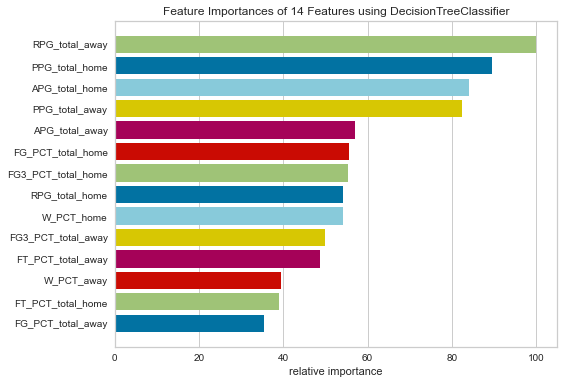

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'max_leaf_nodes': 166, 'criterion': 'entropy'}): 0.56
              precision    recall  f1-score   support

           0       0.58      0.57      0.57       327
           1       0.54      0.55      0.54       300

    accuracy                           0.56       627
   macro avg       0.56      0.56      0.56       627
weighted avg       0.56      0.56      0.56       627



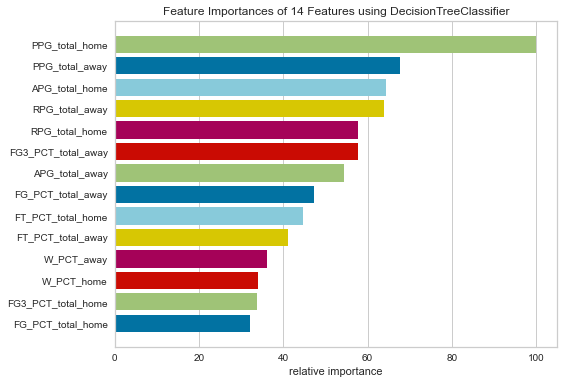

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'max_leaf_nodes': 1074, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       300
           1       0.62      0.62      0.62       327

    accuracy                           0.60       627
   macro avg       0.60      0.60      0.60       627
weighted avg       0.60      0.60      0.60       627



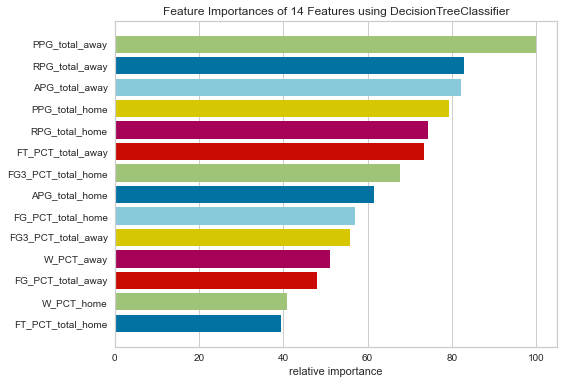

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'max_leaf_nodes': 1358, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.59      0.58      0.59       312
           1       0.59      0.60      0.60       315

    accuracy                           0.59       627
   macro avg       0.59      0.59      0.59       627
weighted avg       0.59      0.59      0.59       627



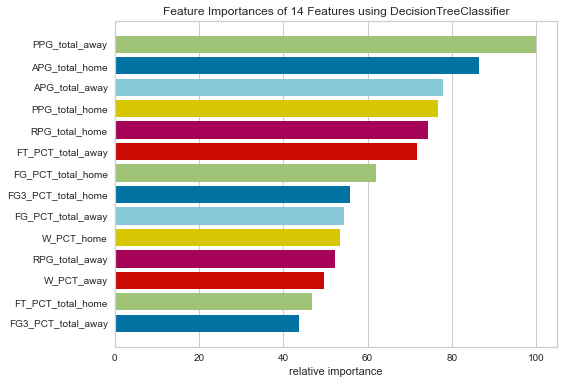

---------------------------------------------
Mean accuracy: 0.5723385802375074
Max accuracy: 0.6028708133971292
Min accuracy: 0.5534290271132376
i=20
AST:

Best decision tree accuracy ({'max_leaf_nodes': 742, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       586
           1       0.50      0.53      0.51       394

    accuracy                           0.60       980
   macro avg       0.59      0.59      0.59       980
weighted avg       0.60      0.60      0.60       980



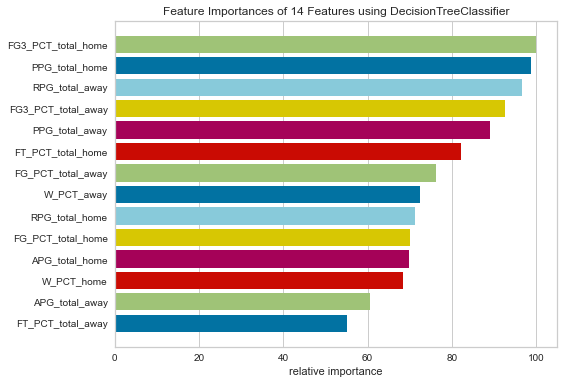

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'max_leaf_nodes': 1418, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       582
           1       0.51      0.49      0.50       398

    accuracy                           0.60       980
   macro avg       0.58      0.58      0.58       980
weighted avg       0.60      0.60      0.60       980



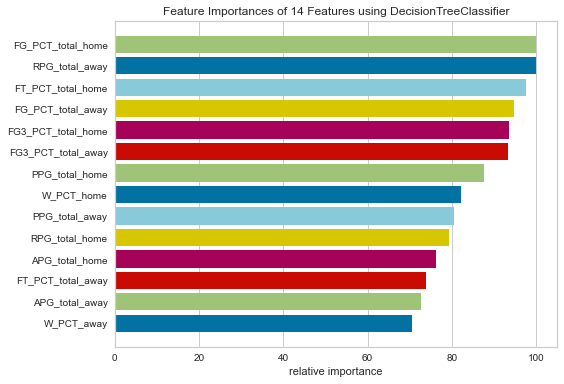

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'max_leaf_nodes': 626, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       562
           1       0.54      0.52      0.53       418

    accuracy                           0.60       980
   macro avg       0.59      0.59      0.59       980
weighted avg       0.60      0.60      0.60       980



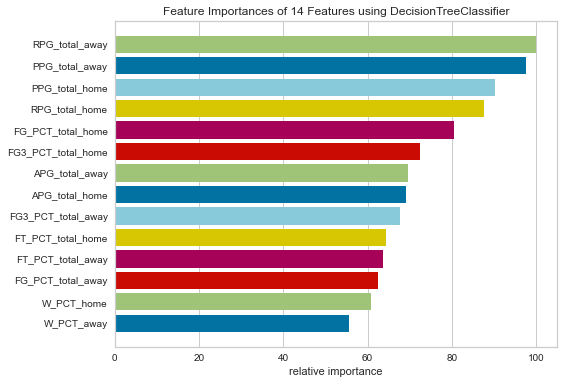

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'max_leaf_nodes': 1582, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       590
           1       0.50      0.53      0.52       389

    accuracy                           0.61       979
   macro avg       0.59      0.59      0.59       979
weighted avg       0.61      0.61      0.61       979



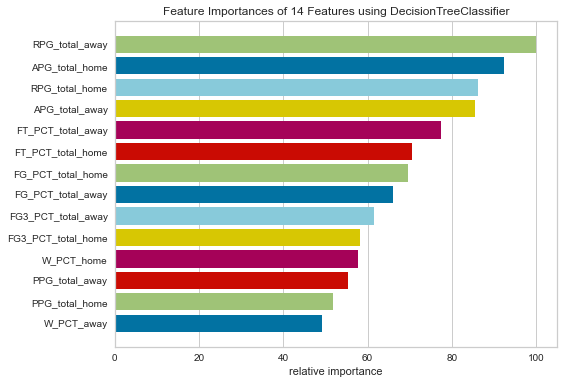

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'max_leaf_nodes': 1120, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       563
           1       0.56      0.54      0.55       416

    accuracy                           0.62       979
   macro avg       0.61      0.61      0.61       979
weighted avg       0.62      0.62      0.62       979



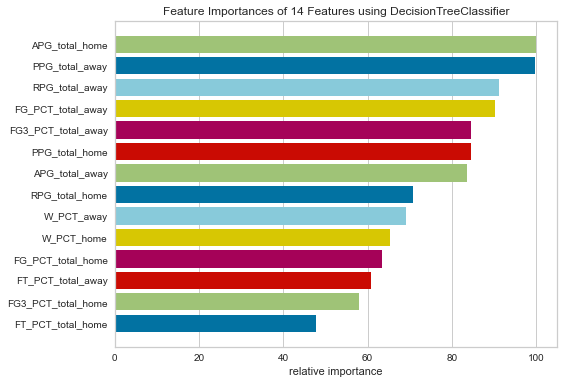

---------------------------------------------
Mean accuracy: 0.6021953367659628
Max accuracy: 0.6057201225740552
Min accuracy: 0.5979591836734693
i=25
REB:

Best decision tree accuracy ({'max_leaf_nodes': 1252, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       487
           1       0.49      0.48      0.49       349

    accuracy                           0.58       836
   macro avg       0.56      0.56      0.56       836
weighted avg       0.57      0.58      0.57       836



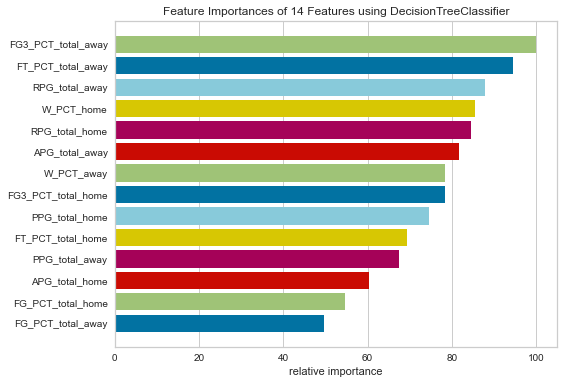

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'max_leaf_nodes': 1962, 'criterion': 'gini'}): 0.63
              precision    recall  f1-score   support

           0       0.66      0.69      0.68       467
           1       0.59      0.55      0.57       369

    accuracy                           0.63       836
   macro avg       0.62      0.62      0.62       836
weighted avg       0.63      0.63      0.63       836



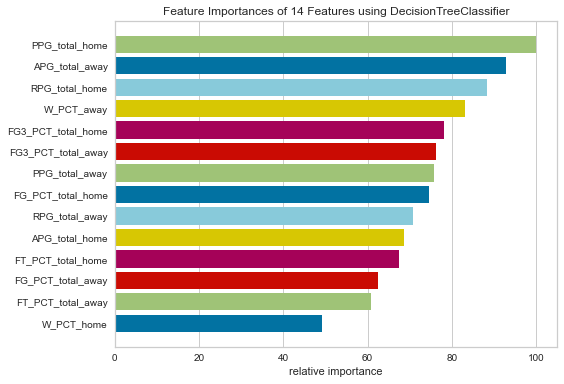

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'max_leaf_nodes': 1216, 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.62      0.66      0.64       471
           1       0.53      0.49      0.51       365

    accuracy                           0.58       836
   macro avg       0.58      0.57      0.57       836
weighted avg       0.58      0.58      0.58       836



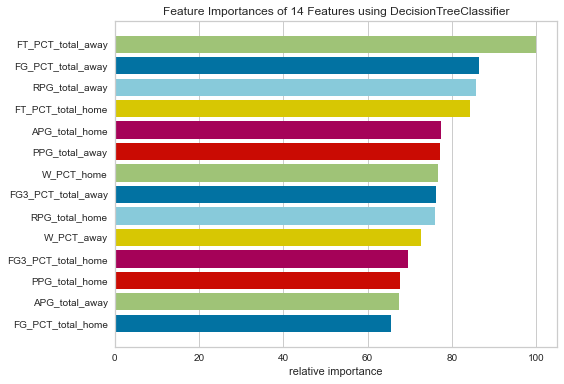

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'max_leaf_nodes': 1538, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       508
           1       0.49      0.53      0.51       328

    accuracy                           0.60       836
   macro avg       0.59      0.59      0.59       836
weighted avg       0.61      0.60      0.60       836



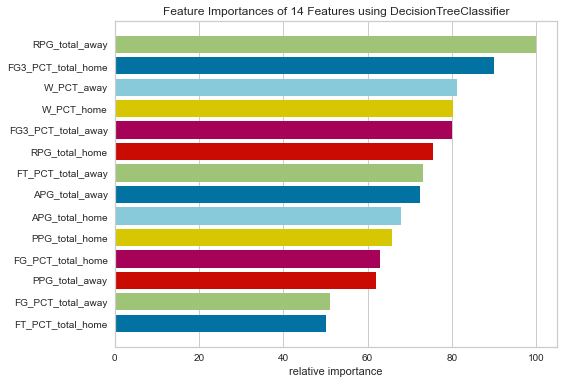

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'max_leaf_nodes': 452, 'criterion': 'entropy'}): 0.63
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       458
           1       0.60      0.55      0.57       378

    accuracy                           0.63       836
   macro avg       0.62      0.62      0.62       836
weighted avg       0.63      0.63      0.63       836



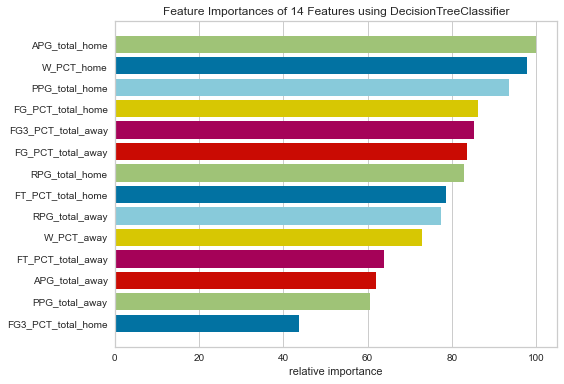

---------------------------------------------
Mean accuracy: 0.5980861244019139
Max accuracy: 0.6291866028708134
Min accuracy: 0.5753588516746412


In [30]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'max_leaf_nodes': [*range(4,60)],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_leaf_nodes': [*range(4,2000,2)],
    'criterion': ['gini', 'entropy'],
})

## Try prune max features

i=0
WINNER:

Best decision tree accuracy ({'max_features': 9, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       855
           1       0.52      0.52      0.52       506

    accuracy                           0.64      1361
   macro avg       0.62      0.62      0.62      1361
weighted avg       0.64      0.64      0.64      1361



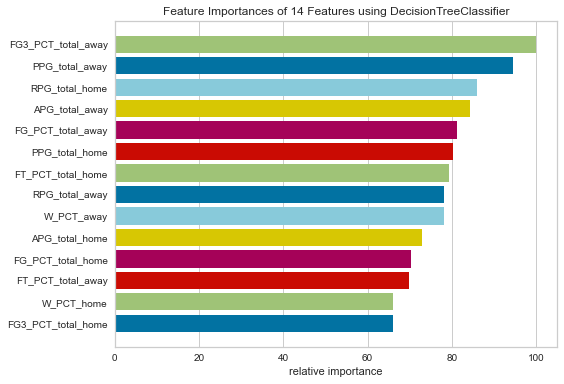

---------------------------------------------
i=1
WINNER:

Best decision tree accuracy ({'max_features': None, 'criterion': 'entropy'}): 0.65
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       847
           1       0.53      0.48      0.51       514

    accuracy                           0.65      1361
   macro avg       0.62      0.61      0.62      1361
weighted avg       0.64      0.65      0.64      1361



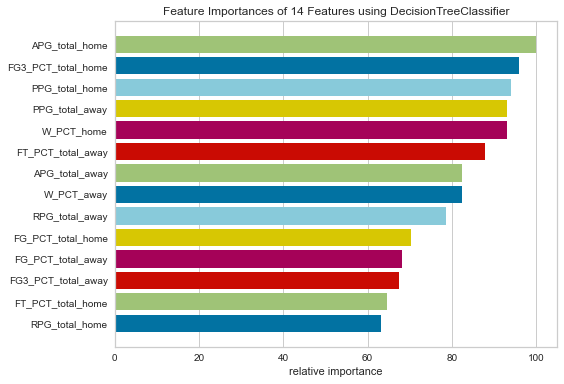

---------------------------------------------
i=2
WINNER:

Best decision tree accuracy ({'max_features': 2, 'criterion': 'gini'}): 0.64
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       862
           1       0.51      0.51      0.51       499

    accuracy                           0.64      1361
   macro avg       0.61      0.61      0.61      1361
weighted avg       0.64      0.64      0.64      1361



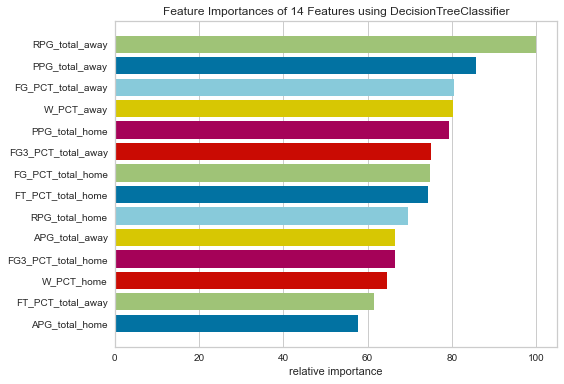

---------------------------------------------
i=3
WINNER:

Best decision tree accuracy ({'max_features': 8, 'criterion': 'gini'}): 0.65
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       857
           1       0.52      0.50      0.51       504

    accuracy                           0.65      1361
   macro avg       0.62      0.62      0.62      1361
weighted avg       0.64      0.65      0.64      1361



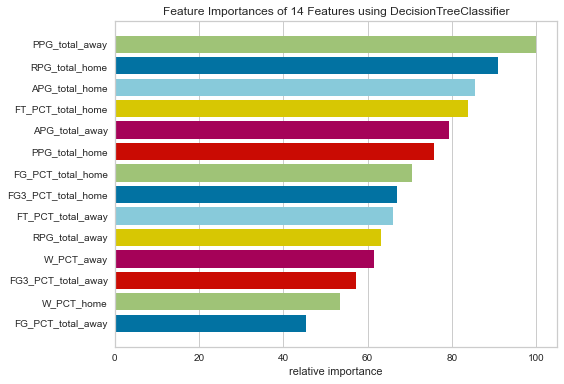

---------------------------------------------
i=4
WINNER:

Best decision tree accuracy ({'max_features': 4, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       863
           1       0.51      0.52      0.52       497

    accuracy                           0.64      1360
   macro avg       0.62      0.62      0.62      1360
weighted avg       0.65      0.64      0.64      1360



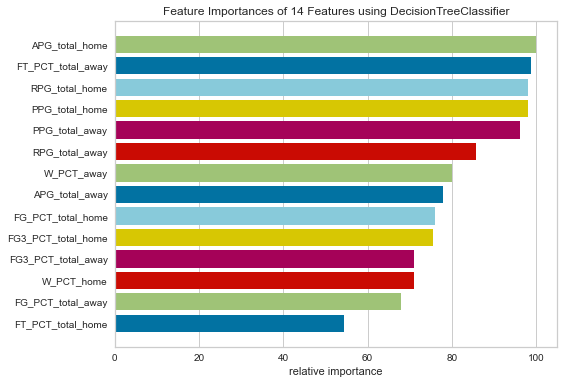

---------------------------------------------
Mean accuracy: 0.6441954445260838
Max accuracy: 0.6465833945628214
Min accuracy: 0.6399706098457016
i=5
FGP:

Best decision tree accuracy ({'max_features': 'log2', 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       599
           1       0.52      0.50      0.51       389

    accuracy                           0.62       988
   macro avg       0.60      0.60      0.60       988
weighted avg       0.62      0.62      0.62       988



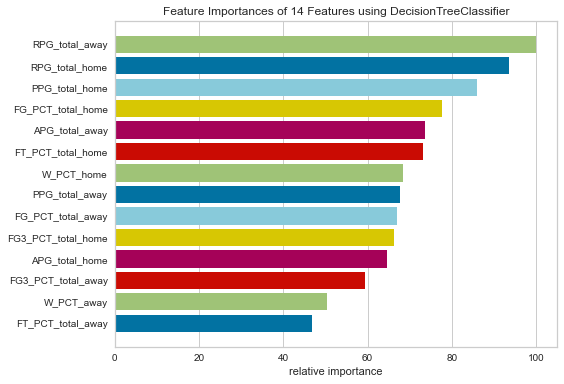

---------------------------------------------
i=6
FGP:

Best decision tree accuracy ({'max_features': None, 'criterion': 'entropy'}): 0.64
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       614
           1       0.53      0.49      0.51       374

    accuracy                           0.64       988
   macro avg       0.62      0.61      0.61       988
weighted avg       0.64      0.64      0.64       988



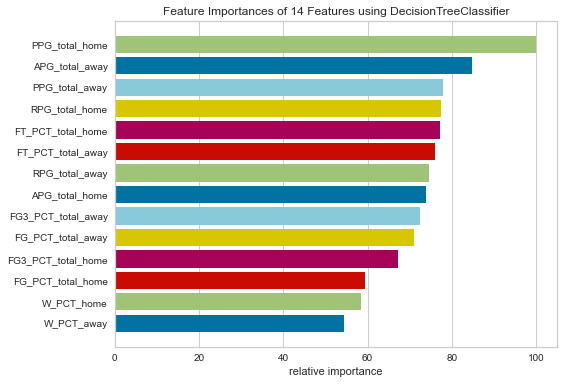

---------------------------------------------
i=7
FGP:

Best decision tree accuracy ({'max_features': 6, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       573
           1       0.54      0.51      0.52       414

    accuracy                           0.61       987
   macro avg       0.60      0.60      0.60       987
weighted avg       0.61      0.61      0.61       987



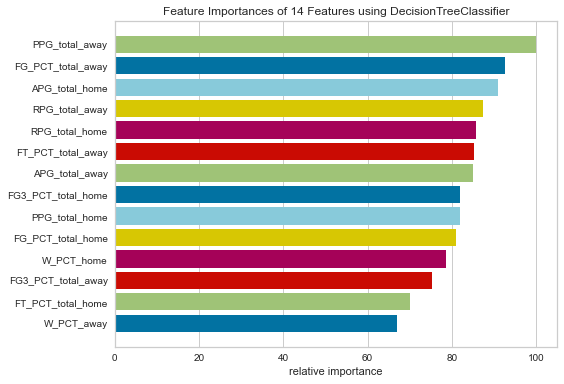

---------------------------------------------
i=8
FGP:

Best decision tree accuracy ({'max_features': 1, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       613
           1       0.47      0.47      0.47       374

    accuracy                           0.60       987
   macro avg       0.57      0.57      0.57       987
weighted avg       0.60      0.60      0.60       987



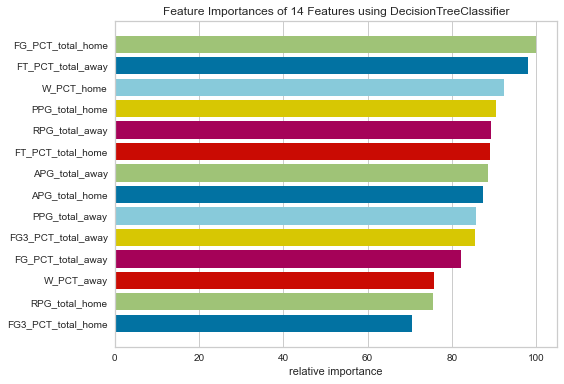

---------------------------------------------
i=9
FGP:

Best decision tree accuracy ({'max_features': 6, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       574
           1       0.54      0.51      0.53       413

    accuracy                           0.61       987
   macro avg       0.60      0.60      0.60       987
weighted avg       0.61      0.61      0.61       987



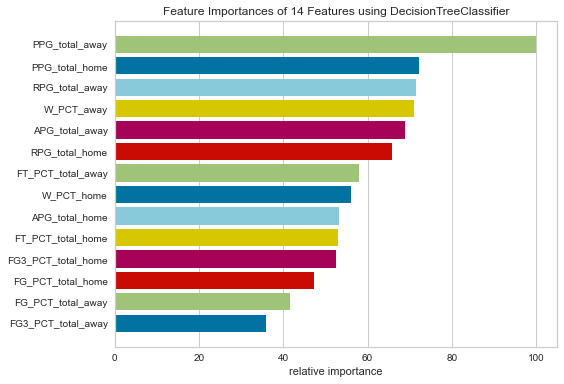

---------------------------------------------
Mean accuracy: 0.6179675354507381
Max accuracy: 0.6417004048582996
Min accuracy: 0.5957446808510638
i=10
FG3:

Best decision tree accuracy ({'max_features': 2, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.60      0.63      0.61       328
           1       0.58      0.55      0.57       307

    accuracy                           0.59       635
   macro avg       0.59      0.59      0.59       635
weighted avg       0.59      0.59      0.59       635



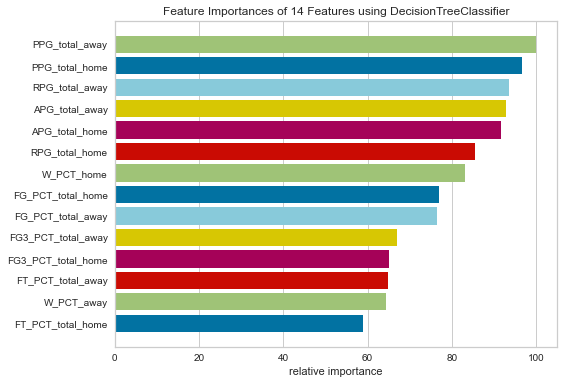

---------------------------------------------
i=11
FG3:

Best decision tree accuracy ({'max_features': 'sqrt', 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.62      0.61      0.61       332
           1       0.58      0.58      0.58       303

    accuracy                           0.60       635
   macro avg       0.60      0.60      0.60       635
weighted avg       0.60      0.60      0.60       635



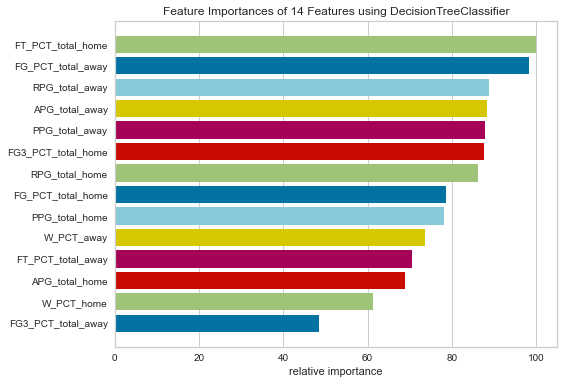

---------------------------------------------
i=12
FG3:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.63      0.57      0.60       347
           1       0.54      0.60      0.57       288

    accuracy                           0.58       635
   macro avg       0.58      0.58      0.58       635
weighted avg       0.59      0.58      0.58       635



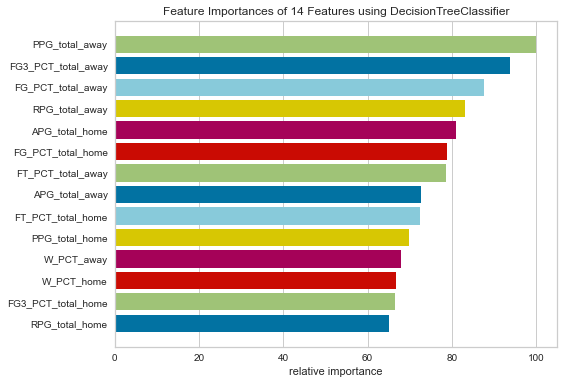

---------------------------------------------
i=13
FG3:

Best decision tree accuracy ({'max_features': 3, 'criterion': 'entropy'}): 0.57
              precision    recall  f1-score   support

           0       0.58      0.61      0.59       331
           1       0.55      0.52      0.53       303

    accuracy                           0.57       634
   macro avg       0.56      0.56      0.56       634
weighted avg       0.57      0.57      0.57       634



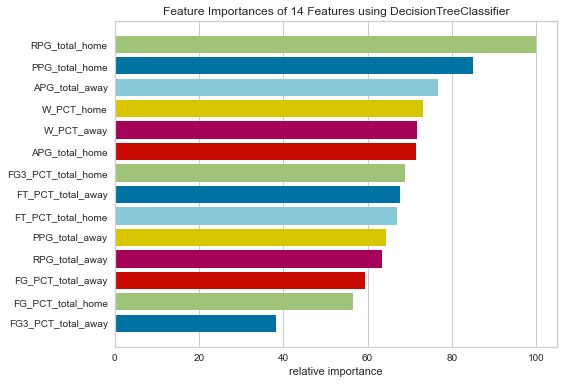

---------------------------------------------
i=14
FG3:

Best decision tree accuracy ({'max_features': 9, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       338
           1       0.59      0.60      0.60       296

    accuracy                           0.62       634
   macro avg       0.62      0.62      0.62       634
weighted avg       0.62      0.62      0.62       634



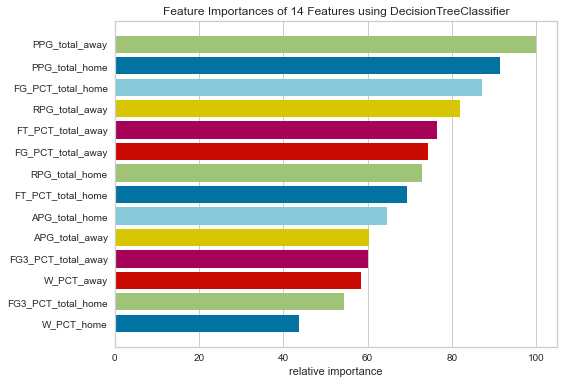

---------------------------------------------
Mean accuracy: 0.5844749000223552
Max accuracy: 0.5968503937007874
Min accuracy: 0.5662460567823344
i=15
FT:

Best decision tree accuracy ({'max_features': 10, 'criterion': 'entropy'}): 0.58
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       312
           1       0.58      0.61      0.60       316

    accuracy                           0.58       628
   macro avg       0.58      0.58      0.58       628
weighted avg       0.58      0.58      0.58       628



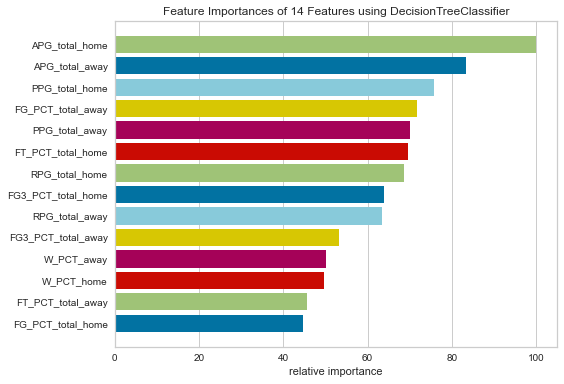

---------------------------------------------
i=16
FT:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'gini'}): 0.54
              precision    recall  f1-score   support

           0       0.52      0.55      0.53       299
           1       0.57      0.53      0.55       328

    accuracy                           0.54       627
   macro avg       0.54      0.54      0.54       627
weighted avg       0.54      0.54      0.54       627



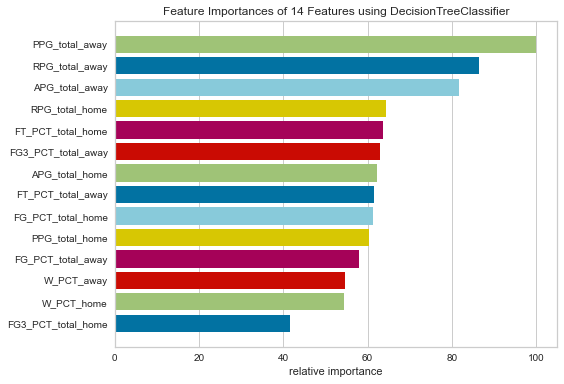

---------------------------------------------
i=17
FT:

Best decision tree accuracy ({'max_features': 2, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.62      0.57      0.59       327
           1       0.57      0.62      0.59       300

    accuracy                           0.59       627
   macro avg       0.59      0.59      0.59       627
weighted avg       0.60      0.59      0.59       627



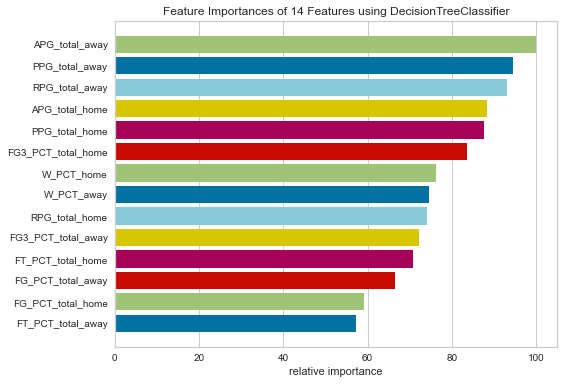

---------------------------------------------
i=18
FT:

Best decision tree accuracy ({'max_features': 10, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.59      0.60      0.60       300
           1       0.63      0.62      0.62       327

    accuracy                           0.61       627
   macro avg       0.61      0.61      0.61       627
weighted avg       0.61      0.61      0.61       627



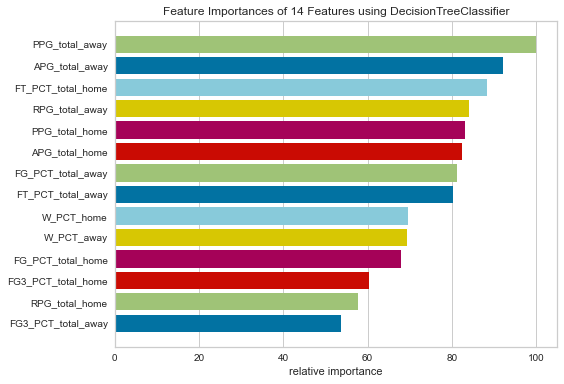

---------------------------------------------
i=19
FT:

Best decision tree accuracy ({'max_features': None, 'criterion': 'gini'}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.55      0.55       312
           1       0.56      0.57      0.57       315

    accuracy                           0.56       627
   macro avg       0.56      0.56      0.56       627
weighted avg       0.56      0.56      0.56       627



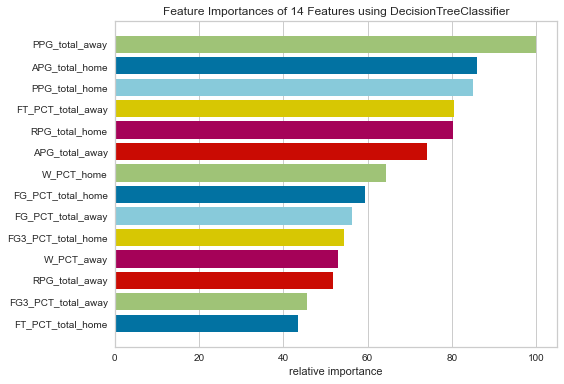

---------------------------------------------
Mean accuracy: 0.5823035077560723
Max accuracy: 0.6108452950558214
Min accuracy: 0.5422647527910686
i=20
AST:

Best decision tree accuracy ({'max_features': 'log2', 'criterion': 'gini'}): 0.58
              precision    recall  f1-score   support

           0       0.65      0.64      0.64       586
           1       0.47      0.48      0.48       394

    accuracy                           0.58       980
   macro avg       0.56      0.56      0.56       980
weighted avg       0.58      0.58      0.58       980



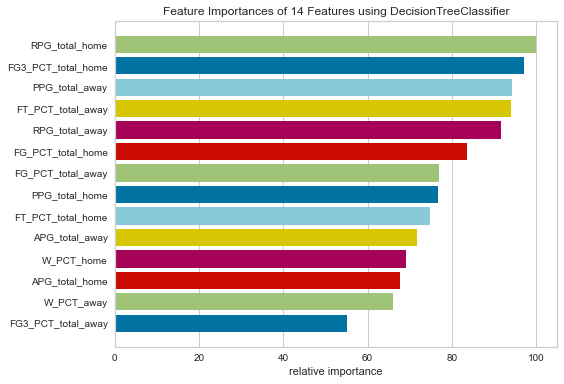

---------------------------------------------
i=21
AST:

Best decision tree accuracy ({'max_features': 2, 'criterion': 'gini'}): 0.61
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       582
           1       0.51      0.51      0.51       398

    accuracy                           0.61       980
   macro avg       0.59      0.59      0.59       980
weighted avg       0.60      0.61      0.60       980



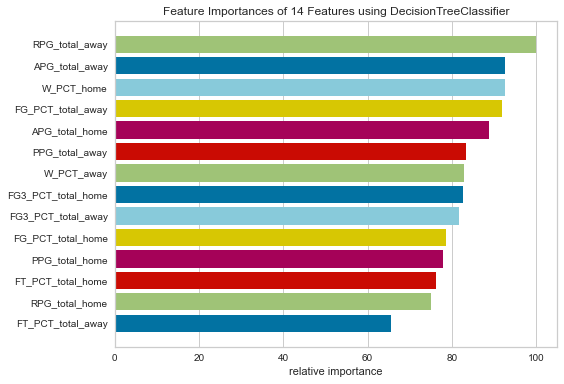

---------------------------------------------
i=22
AST:

Best decision tree accuracy ({'max_features': 7, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       562
           1       0.53      0.53      0.53       418

    accuracy                           0.60       980
   macro avg       0.59      0.59      0.59       980
weighted avg       0.60      0.60      0.60       980



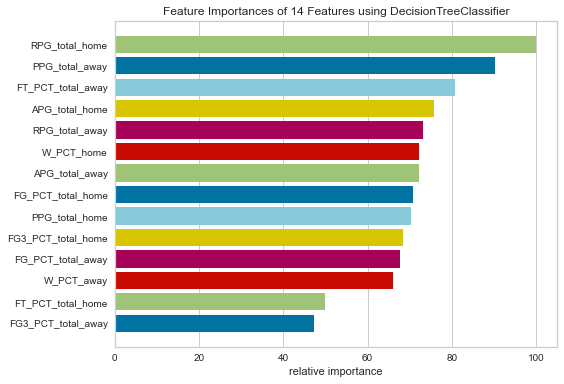

---------------------------------------------
i=23
AST:

Best decision tree accuracy ({'max_features': None, 'criterion': 'gini'}): 0.62
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       590
           1       0.53      0.53      0.53       389

    accuracy                           0.62       979
   macro avg       0.61      0.61      0.61       979
weighted avg       0.62      0.62      0.62       979



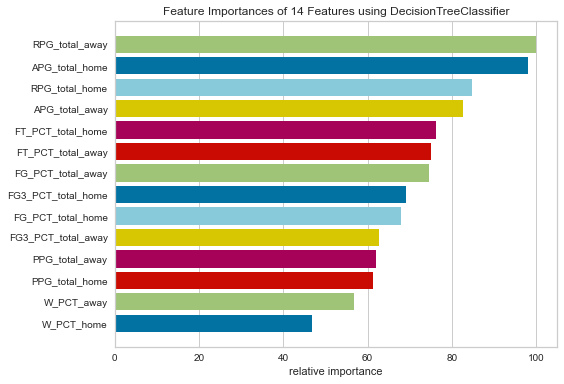

---------------------------------------------
i=24
AST:

Best decision tree accuracy ({'max_features': 9, 'criterion': 'entropy'}): 0.61
              precision    recall  f1-score   support

           0       0.66      0.69      0.67       563
           1       0.55      0.51      0.53       416

    accuracy                           0.61       979
   macro avg       0.60      0.60      0.60       979
weighted avg       0.61      0.61      0.61       979



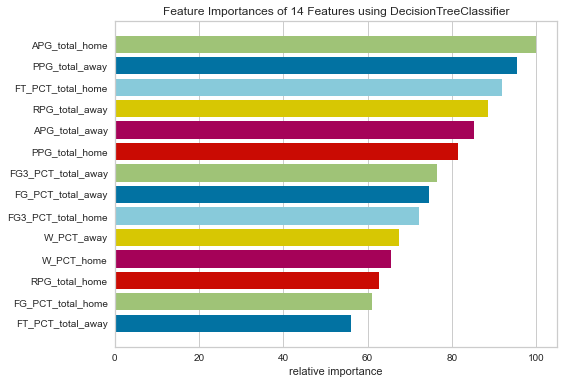

---------------------------------------------
Mean accuracy: 0.6001592107731755
Max accuracy: 0.6241062308478039
Min accuracy: 0.5755102040816327
i=25
REB:

Best decision tree accuracy ({'max_features': 11, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       487
           1       0.51      0.50      0.51       349

    accuracy                           0.59       836
   macro avg       0.58      0.58      0.58       836
weighted avg       0.59      0.59      0.59       836



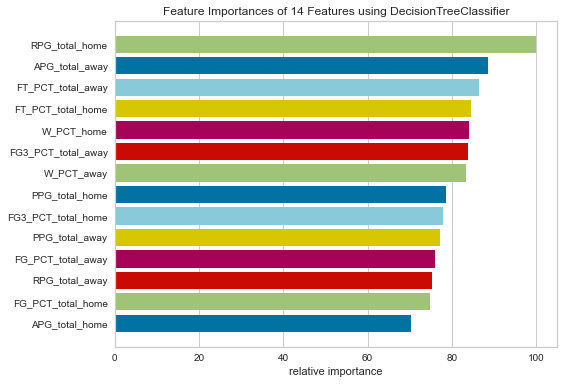

---------------------------------------------
i=26
REB:

Best decision tree accuracy ({'max_features': 2, 'criterion': 'gini'}): 0.59
              precision    recall  f1-score   support

           0       0.63      0.66      0.65       467
           1       0.54      0.51      0.53       369

    accuracy                           0.59       836
   macro avg       0.59      0.59      0.59       836
weighted avg       0.59      0.59      0.59       836



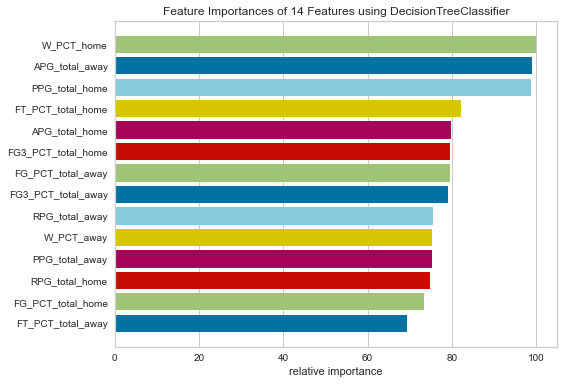

---------------------------------------------
i=27
REB:

Best decision tree accuracy ({'max_features': 2, 'criterion': 'entropy'}): 0.59
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       471
           1       0.54      0.50      0.51       365

    accuracy                           0.59       836
   macro avg       0.58      0.58      0.58       836
weighted avg       0.59      0.59      0.59       836



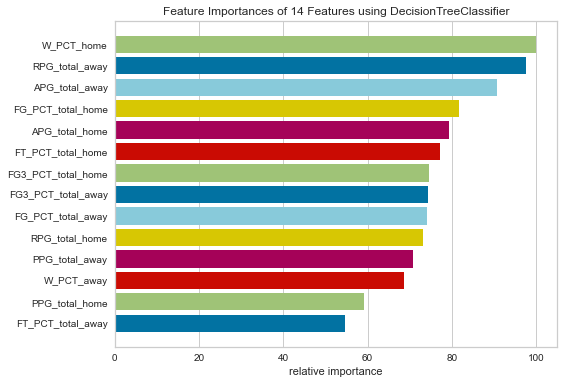

---------------------------------------------
i=28
REB:

Best decision tree accuracy ({'max_features': 4, 'criterion': 'gini'}): 0.60
              precision    recall  f1-score   support

           0       0.68      0.67      0.67       508
           1       0.50      0.50      0.50       328

    accuracy                           0.60       836
   macro avg       0.59      0.59      0.59       836
weighted avg       0.60      0.60      0.60       836



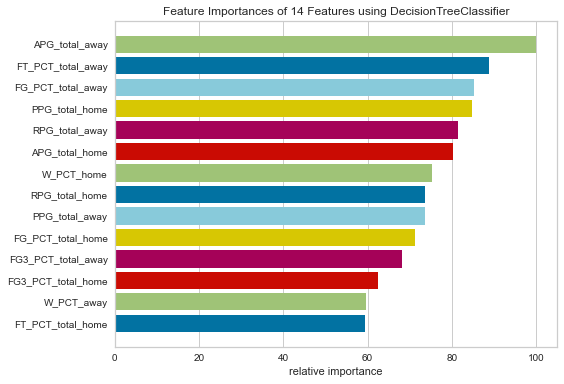

---------------------------------------------
i=29
REB:

Best decision tree accuracy ({'max_features': 5, 'criterion': 'entropy'}): 0.60
              precision    recall  f1-score   support

           0       0.63      0.66      0.64       458
           1       0.56      0.53      0.54       378

    accuracy                           0.60       836
   macro avg       0.59      0.59      0.59       836
weighted avg       0.60      0.60      0.60       836



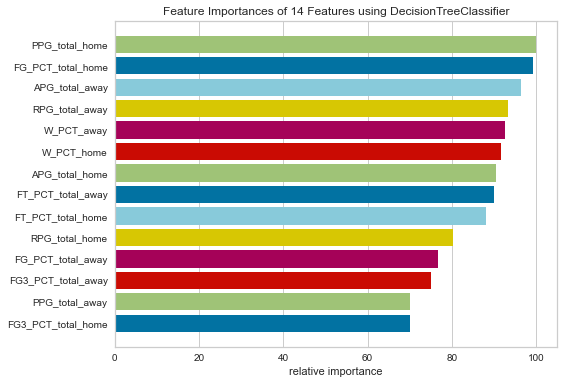

---------------------------------------------
Mean accuracy: 0.5962918660287081
Max accuracy: 0.604066985645933
Min accuracy: 0.5921052631578947


In [31]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
})

## Try class weight balance

i=0


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.66
              precision    recall  f1-score   support

           0       0.72      0.73      0.73       855
           1       0.54      0.53      0.53       506

    accuracy                           0.66      1361
   macro avg       0.63      0.63      0.63      1361
weighted avg       0.65      0.66      0.65      1361



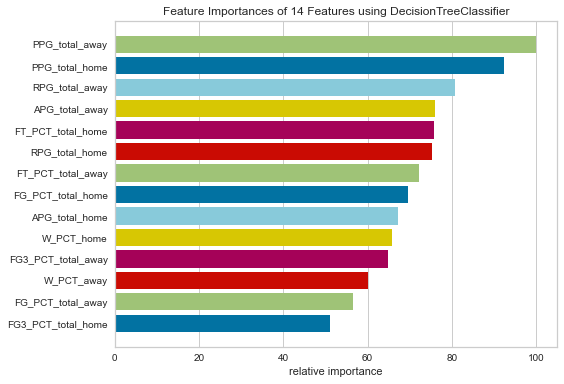

---------------------------------------------
i=1


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.66
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       847
           1       0.56      0.48      0.51       514

    accuracy                           0.66      1361
   macro avg       0.63      0.62      0.63      1361
weighted avg       0.65      0.66      0.65      1361



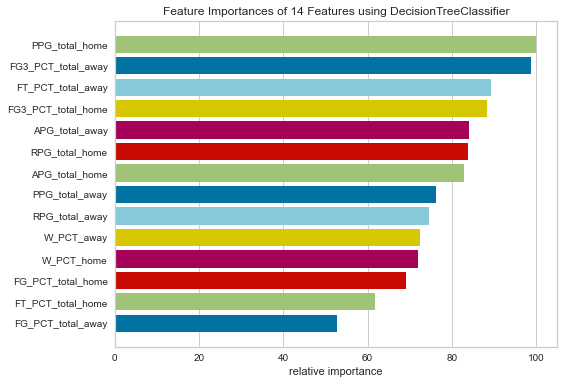

---------------------------------------------
i=2


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.68
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       862
           1       0.56      0.54      0.55       499

    accuracy                           0.68      1361
   macro avg       0.65      0.65      0.65      1361
weighted avg       0.67      0.68      0.68      1361



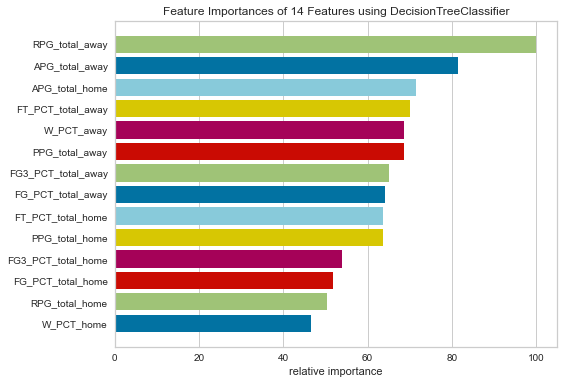

---------------------------------------------
i=3


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.63
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       857
           1       0.50      0.45      0.47       504

    accuracy                           0.63      1361
   macro avg       0.60      0.59      0.60      1361
weighted avg       0.62      0.63      0.63      1361



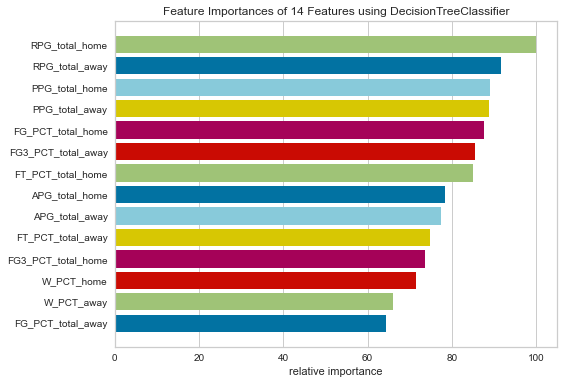

---------------------------------------------
i=4


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


WINNER:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.64
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       863
           1       0.51      0.52      0.51       497

    accuracy                           0.64      1360
   macro avg       0.61      0.61      0.61      1360
weighted avg       0.64      0.64      0.64      1360



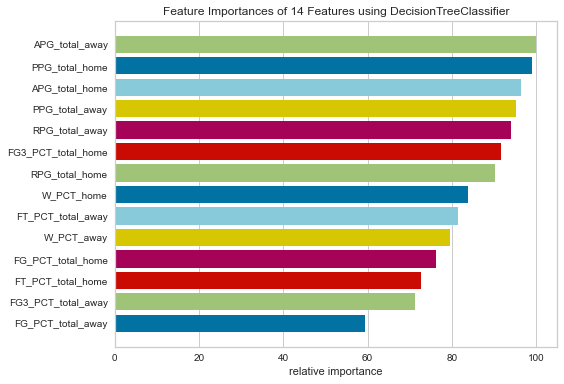

---------------------------------------------
Mean accuracy: 0.6555841293166789
Max accuracy: 0.677443056576047
Min accuracy: 0.6311535635562087
i=5


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.64
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       599
           1       0.54      0.53      0.53       389

    accuracy                           0.64       988
   macro avg       0.62      0.62      0.62       988
weighted avg       0.63      0.64      0.63       988



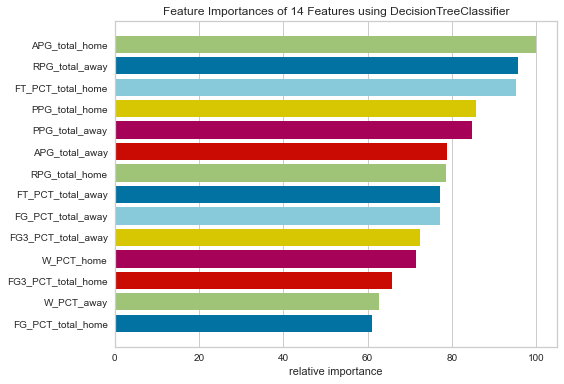

---------------------------------------------
i=6


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.63
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       614
           1       0.51      0.53      0.52       374

    accuracy                           0.63       988
   macro avg       0.61      0.61      0.61       988
weighted avg       0.63      0.63      0.63       988



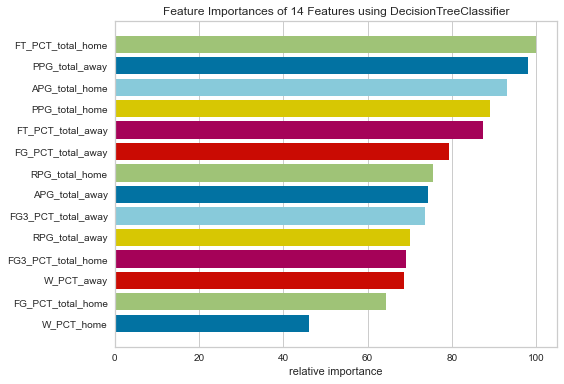

---------------------------------------------
i=7


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.62
              precision    recall  f1-score   support

           0       0.67      0.69      0.68       573
           1       0.55      0.53      0.54       414

    accuracy                           0.62       987
   macro avg       0.61      0.61      0.61       987
weighted avg       0.62      0.62      0.62       987



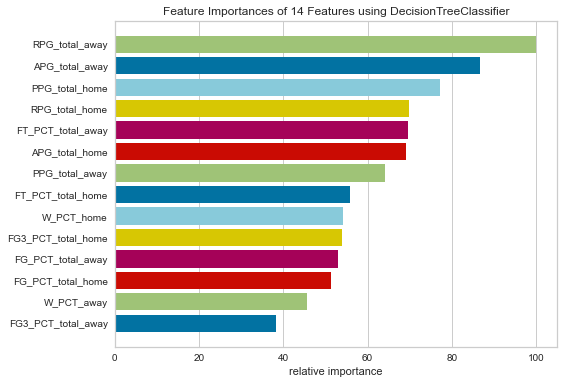

---------------------------------------------
i=8


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.61
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       613
           1       0.48      0.52      0.50       374

    accuracy                           0.61       987
   macro avg       0.59      0.59      0.59       987
weighted avg       0.61      0.61      0.61       987



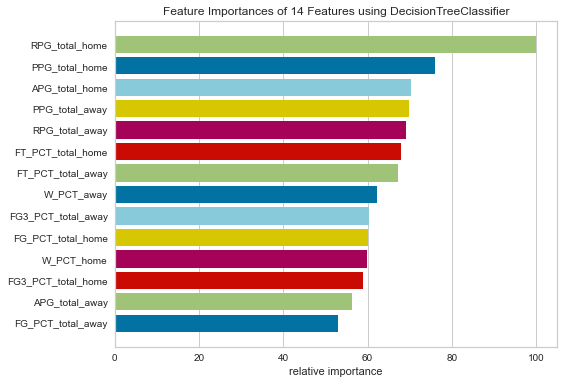

---------------------------------------------
i=9


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FGP:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.64
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       574
           1       0.59      0.50      0.54       413

    accuracy                           0.64       987
   macro avg       0.63      0.62      0.62       987
weighted avg       0.64      0.64      0.64       987



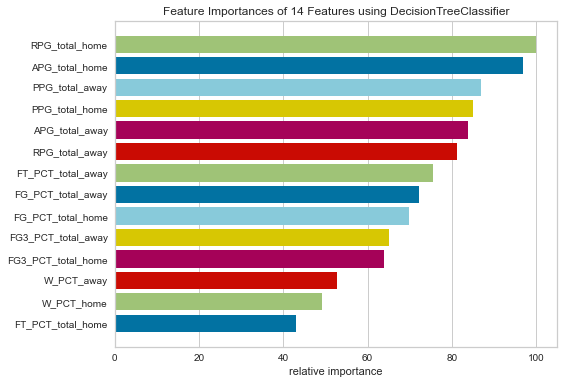

---------------------------------------------
Mean accuracy: 0.6222742822686832
Max accuracy: 0.6356275303643725
Min accuracy: 0.6058763931104356
i=10


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.59
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       328
           1       0.57      0.57      0.57       307

    accuracy                           0.59       635
   macro avg       0.59      0.59      0.59       635
weighted avg       0.59      0.59      0.59       635



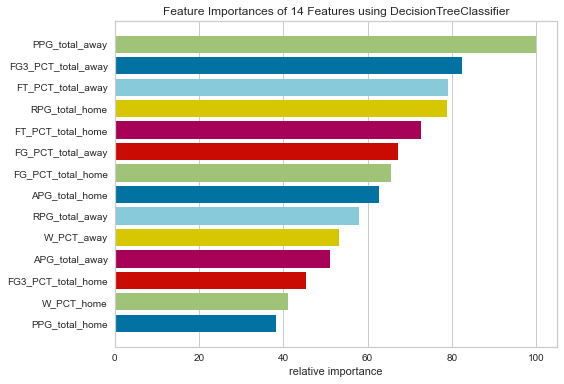

---------------------------------------------
i=11


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.57
              precision    recall  f1-score   support

           0       0.59      0.58      0.59       332
           1       0.55      0.57      0.56       303

    accuracy                           0.57       635
   macro avg       0.57      0.57      0.57       635
weighted avg       0.57      0.57      0.57       635



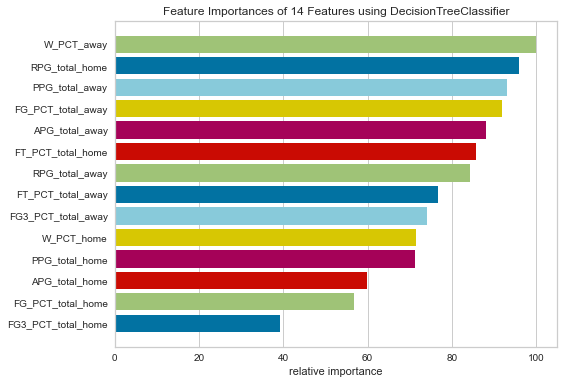

---------------------------------------------
i=12


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.60
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       347
           1       0.55      0.58      0.57       288

    accuracy                           0.60       635
   macro avg       0.59      0.59      0.59       635
weighted avg       0.60      0.60      0.60       635



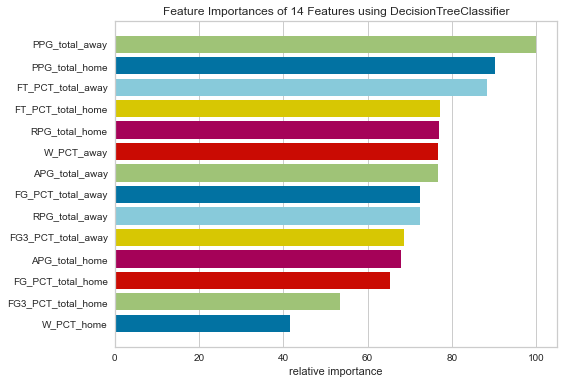

---------------------------------------------
i=13


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.57
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       331
           1       0.55      0.55      0.55       303

    accuracy                           0.57       634
   macro avg       0.57      0.57      0.57       634
weighted avg       0.57      0.57      0.57       634



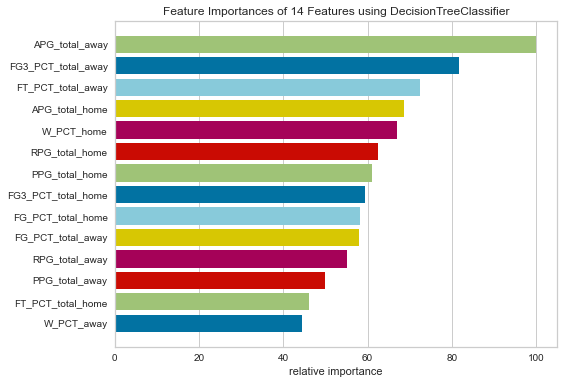

---------------------------------------------
i=14


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FG3:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.63
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       338
           1       0.61      0.56      0.59       296

    accuracy                           0.63       634
   macro avg       0.63      0.63      0.63       634
weighted avg       0.63      0.63      0.63       634



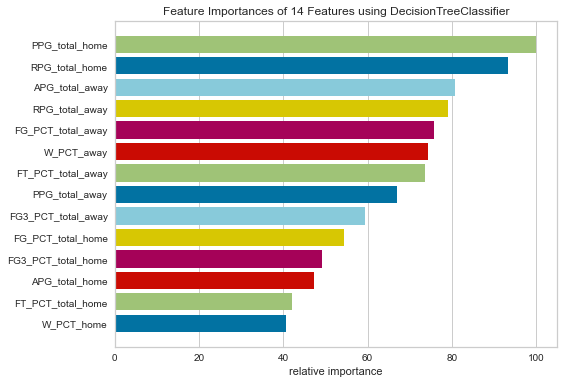

---------------------------------------------
Mean accuracy: 0.580932213914901
Max accuracy: 0.5952755905511811
Min accuracy: 0.5678233438485805
i=15


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.60
              precision    recall  f1-score   support

           0       0.60      0.56      0.58       312
           1       0.60      0.63      0.61       316

    accuracy                           0.60       628
   macro avg       0.60      0.60      0.60       628
weighted avg       0.60      0.60      0.60       628



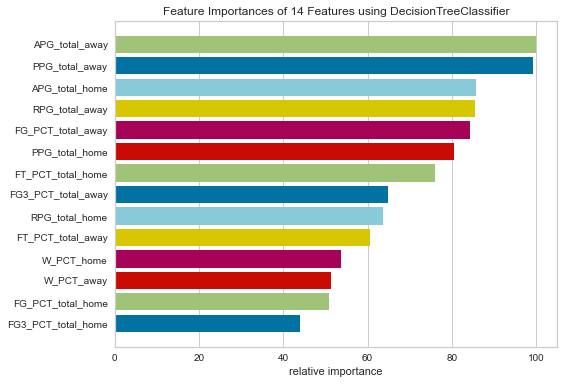

---------------------------------------------
i=16


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.56
              precision    recall  f1-score   support

           0       0.54      0.57      0.55       299
           1       0.59      0.56      0.57       328

    accuracy                           0.56       627
   macro avg       0.56      0.56      0.56       627
weighted avg       0.56      0.56      0.56       627



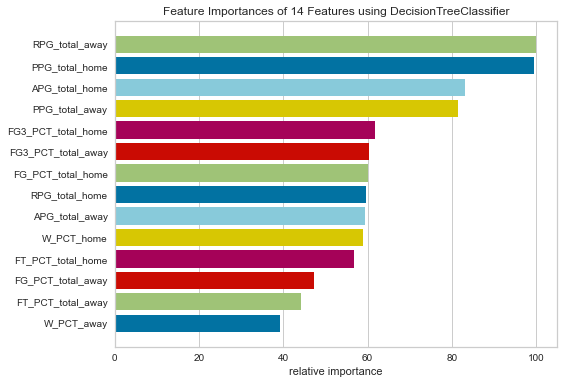

---------------------------------------------
i=17


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.56
              precision    recall  f1-score   support

           0       0.58      0.57      0.57       327
           1       0.54      0.56      0.55       300

    accuracy                           0.56       627
   macro avg       0.56      0.56      0.56       627
weighted avg       0.56      0.56      0.56       627



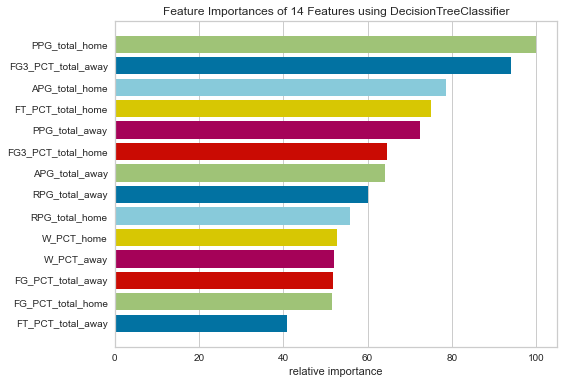

---------------------------------------------
i=18


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.62
              precision    recall  f1-score   support

           0       0.60      0.61      0.61       300
           1       0.64      0.63      0.64       327

    accuracy                           0.62       627
   macro avg       0.62      0.62      0.62       627
weighted avg       0.62      0.62      0.62       627



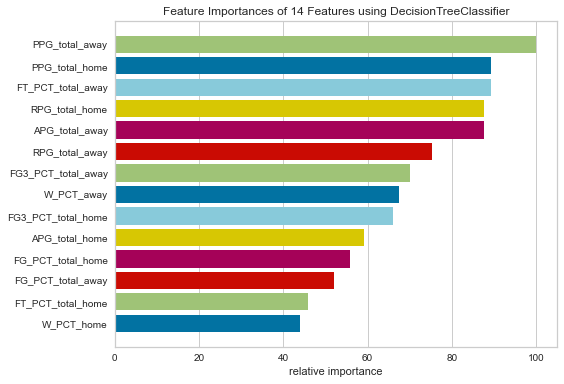

---------------------------------------------
i=19


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


FT:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.56
              precision    recall  f1-score   support

           0       0.56      0.55      0.55       312
           1       0.56      0.57      0.57       315

    accuracy                           0.56       627
   macro avg       0.56      0.56      0.56       627
weighted avg       0.56      0.56      0.56       627



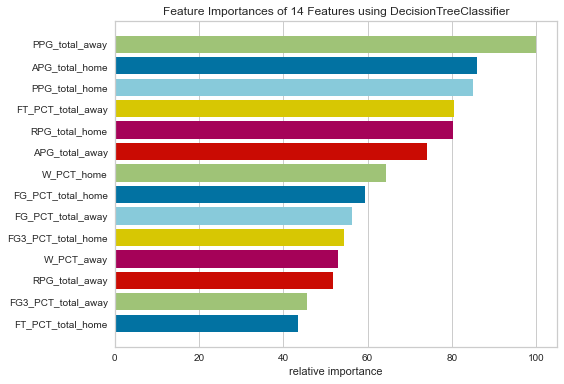

---------------------------------------------
Mean accuracy: 0.5862843994758175
Max accuracy: 0.6220095693779905
Min accuracy: 0.5614035087719298
i=20


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.60
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       586
           1       0.50      0.53      0.51       394

    accuracy                           0.60       980
   macro avg       0.59      0.59      0.59       980
weighted avg       0.60      0.60      0.60       980



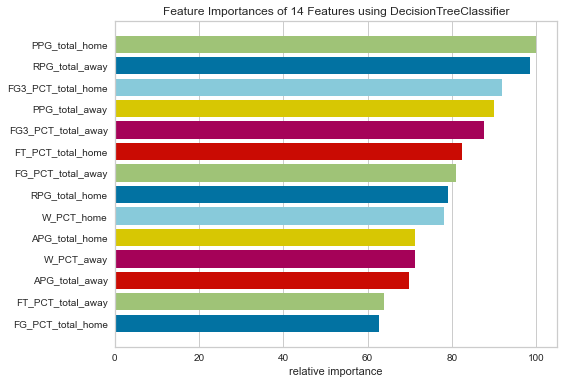

---------------------------------------------
i=21


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.61
              precision    recall  f1-score   support

           0       0.67      0.68      0.68       582
           1       0.52      0.52      0.52       398

    accuracy                           0.61       980
   macro avg       0.60      0.60      0.60       980
weighted avg       0.61      0.61      0.61       980



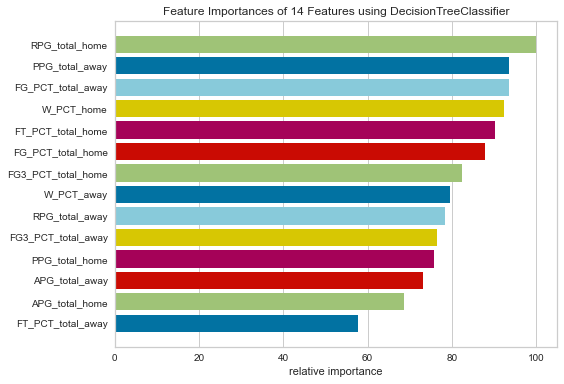

---------------------------------------------
i=22


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.62
              precision    recall  f1-score   support

           0       0.66      0.69      0.68       562
           1       0.56      0.52      0.54       418

    accuracy                           0.62       980
   macro avg       0.61      0.61      0.61       980
weighted avg       0.62      0.62      0.62       980



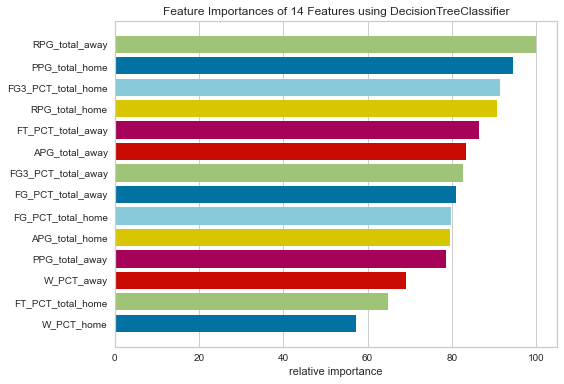

---------------------------------------------
i=23


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.62
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       590
           1       0.53      0.53      0.53       389

    accuracy                           0.62       979
   macro avg       0.61      0.61      0.61       979
weighted avg       0.62      0.62      0.62       979



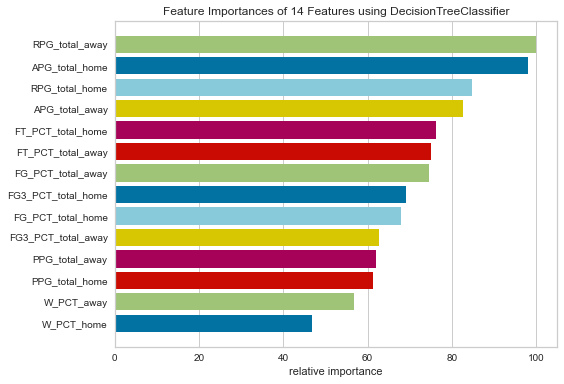

---------------------------------------------
i=24


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AST:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.62
              precision    recall  f1-score   support

           0       0.66      0.69      0.68       563
           1       0.56      0.53      0.54       416

    accuracy                           0.62       979
   macro avg       0.61      0.61      0.61       979
weighted avg       0.62      0.62      0.62       979



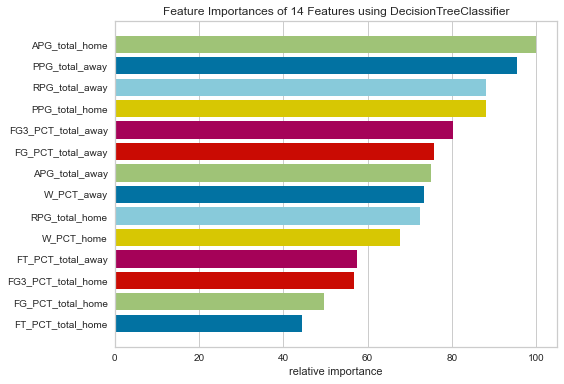

---------------------------------------------
Mean accuracy: 0.6141898230180733
Max accuracy: 0.6241062308478039
Min accuracy: 0.5989795918367347
i=25


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': 'balanced'}): 0.61
              precision    recall  f1-score   support

           0       0.66      0.68      0.67       487
           1       0.53      0.50      0.52       349

    accuracy                           0.61       836
   macro avg       0.59      0.59      0.59       836
weighted avg       0.60      0.61      0.61       836



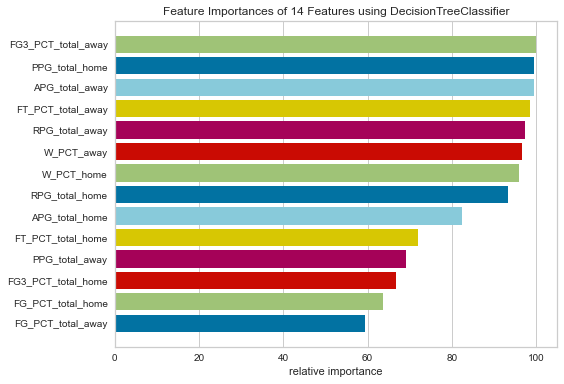

---------------------------------------------
i=26


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': 'balanced'}): 0.62
              precision    recall  f1-score   support

           0       0.65      0.68      0.67       467
           1       0.57      0.54      0.56       369

    accuracy                           0.62       836
   macro avg       0.61      0.61      0.61       836
weighted avg       0.62      0.62      0.62       836



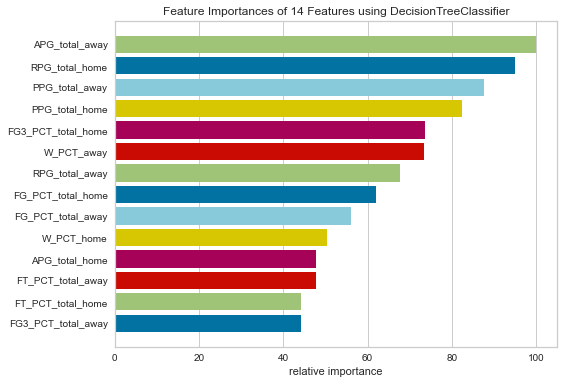

---------------------------------------------
i=27


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.57
              precision    recall  f1-score   support

           0       0.61      0.66      0.64       471
           1       0.51      0.47      0.49       365

    accuracy                           0.57       836
   macro avg       0.56      0.56      0.56       836
weighted avg       0.57      0.57      0.57       836



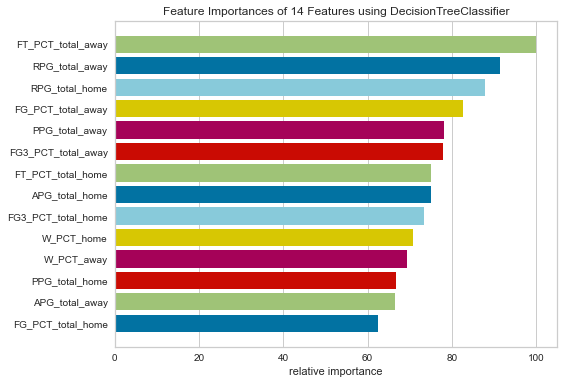

---------------------------------------------
i=28


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'gini', 'class_weight': None}): 0.60
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       508
           1       0.49      0.53      0.51       328

    accuracy                           0.60       836
   macro avg       0.58      0.59      0.58       836
weighted avg       0.60      0.60      0.60       836



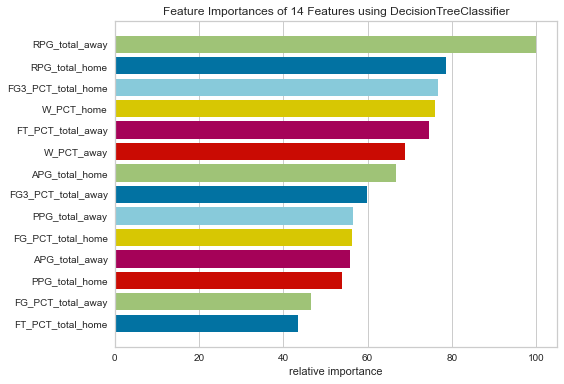

---------------------------------------------
i=29


c:\users\philip\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


REB:

Best decision tree accuracy ({'criterion': 'entropy', 'class_weight': None}): 0.61
              precision    recall  f1-score   support

           0       0.63      0.68      0.66       458
           1       0.57      0.52      0.55       378

    accuracy                           0.61       836
   macro avg       0.60      0.60      0.60       836
weighted avg       0.61      0.61      0.61       836



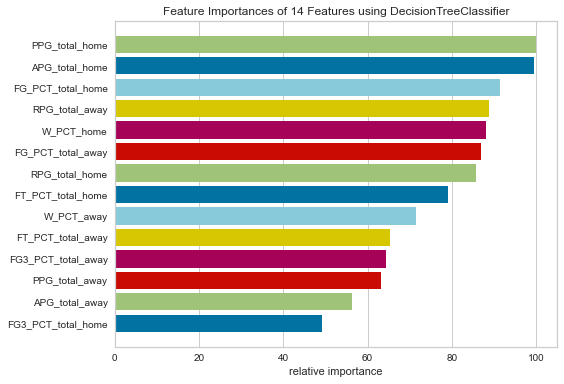

---------------------------------------------
Mean accuracy: 0.5992822966507177
Max accuracy: 0.618421052631579
Min accuracy: 0.5741626794258373


In [32]:
# print_all_metrics_and_plot(
#     DecisionTreeClassifier(random_state=0),
#     X_train_dict,
#     X_test_dict,
#     {
#         'class_weight': ['balanced', None],
#         'criterion': ['gini', 'entropy'],
#     },
# )
print_cross_validated_and_plot(X_train_dicts, X_test_dicts, y_train_dicts, y_test_dicts, {
    'class_weight': ['balanced', None],
    'criterion': ['gini', 'entropy'],
})

## Try w/ diffrent random_state

In [33]:
print_all_metrics_and_plot(
    DecisionTreeClassifier(random_state=1234),
    X_train_dict,
    X_test_dict,
    {
        'max_depth': [*range(4,35)],
        'criterion': ['gini', 'entropy'],
    },
)

TypeError: print_all_metrics_and_plot() missing 2 required positional arguments: 'y_test_dict' and 'grid_cv_params'

In [ ]:
print_all_metrics_and_plot(
    DecisionTreeClassifier(random_state=76634),
    X_train_dict,
    X_test_dict,
    {
        'max_leaf_nodes': [*range(4,60)],
        'criterion': ['gini', 'entropy'],
    },
)